# Projet 06:  CLASSIFIEZ AUTOMATIQUEMENT DES BIENS DE   CONSOMMATION

- **Problématique** : Etudier la faisabilité d'un moteur de classification automatique des biens d'un site de e-commerce

- **Mission** : 
  - Effectuer un pretraitment des donées textuelles et visuelles
  
  - Effectuer une classification non_supervisée 
  
  - Representer le résultat en 2D 
  
  - Evaluer la précision de clustering 

# Sommaire 

- **1. Chargement des librairies** 
- **2. Télécharger les données**
- **3. Aperçu sur les données** 

### I. Données Textuelle (NLP) 

- **4. Nettoyage des données : extraire les catégories principales**

- **5.Création d’un corpus pour le nom des produits et leurs descriptions**

- **6. Prétraitement des textes à l’aide de NLTK (Natural Language Toolkit)** 
       - Texte preprocessing : ( supprimer les ponctuation, les espace blanc multiple , convertir au minuscule.. ) 
       - Standardisation des textes : Tokenization, supprimer les stopwords, Lemmatization/Stemming , POS tagging 

- **7.Analyse descriptive des corpus de nom des produits et les description** 
         - Les mots les plus fréquent dans chaque corpus 
         - Nuage des mots par catégorie 
         - Analyse n-gram pour capter des informations relatives à la cooccurrence des mots
         - Création d’un corpus total avec le nom des produits et leur descriptions
         - Affichage des mots les plus fréquent pour identifier les mots non-significatifs 
         - Supprimer les stopwords de domains 
         - Analyse n-gram dans le corpus final 

- **8. Modélisation** 
   -Création des fonctions communes 
   - **Feature extraction : représentation vectorielle du texte (BagOfWOrds, TFIDF, Word2Vec, Universal Sentence Embedding)** 
-   **Approche BagOfWords** 
          - Création du matrice de BOW
          - Afficher la fréquence des mots par catégories
          - Réduction de la dimensionnalité à l’aide de truncated SVD  ;
          - Clustering avec kmeans (k=7) 
          - Matrice de confusion 
          - Score ARI (Adjusted Rand Index) 
          - Reduction de la dimensionalité à l’aide de T-SNE pour la visualisation 2D des clusters 


-	**Approche TFIDF (term frequency–inverse document frequency)** 
          - Création du matrice de TFIDF
          - Afficher la fréquence des mots par catégories
          -  Réduction de la dimensionnalité à l’aide de truncated SVD  ;
          - Clustering avec kmeans (k=7) 
          - Matrice de confusion 
          - Score ARI (Adjusted Rand Index) 
          - Reduction de la dimensionalité à l’aide de T-SNE pour la visualisation 2D des clusters 

      
-   **Approche wordembedding avec Word2Vec** 

            - Création du document vectorizé (avec architecture Countinous Bag of Words)
            - Calcul du moyenne des vectors pour les documents (= produits)  
            - Clustering avec kmeans (k=7) avec et sans réduction de la dimension-nalité à l’aide de PCA (Principale Component Analysis)
            - Matrice de confusion 
            - Score ARI (Adjusted Rand Index) 
            - Reduction de la dimensionalité à l’aide de T-SNE pour la visualisation 2D des clusters 

-   **Topic modeling avec Latent Dirichlet Allocation (LDA)**
            - Matrice de confusion 
            - Score ARI (Adjusted Rand Index) 
            - Visualisation de part de chaque catégorie dans les topics crées 


	
-   **Approche DeepLearning :  Sentence Embedding avec Google’s** 
            - Universal Sentence Use Encoder 
            - Télécharger le modèle pré-trainé du google depuis TensorFlow hub
            - Création d’une représentation vectorielle du document à l’aide de sentence encoder  de USE
            - Réduction de la dimensionnalité avec SVD en conservant 0.99 de variance
            - Clustering avec kmeans (k=7)
            - Matrice de confusion 
            - Score ARI (Adjusted Rand Index) 
            - Reduction de la dimensionalité à l’aide de T-SNE pour la visualisation 2D des clusters 

 
### II. Computer vision 
-    **Création d'un dataframe avec catégories pour les images**
-    **Analyse exploratoire des images**
            - Load et  affichage des 4 images de chaque catégorie
-    **Prétraiement des images avant extraction des features**  
-    **Extraction des features avec ORB (Oriented FAST and rotated BRIEF)** 
            - Obtenir les descripteurs de chaque image
            - Création des clusters de descripteurs
            - Création d’un visual bag of words avec a MiniBatchKMeans (k= √ nbre des clusters)
            - Création des histogram 
            - Réduction de dimensionnalité à l’aide de PCA
            - Réduction de diemnsionnalité en 2D à l’aide de Tsne 
	

-      **Clustering à l’aide de Kmean(k = 7)**
-      **Matrice de confusion** 
-      **Score ARI (Adjusted Rand Index)** 
-      **Analyse visuelle : affichage T-SNE selon catégories réelle des images** 


-     **Approche Deep learning (Convolutional Neural Network)** 
            - Prétraitement des images pour CNN : redimensionner en 224x224 ; Reshape  de la matrice des données	
            - Création d'un simple Réseau de neurone pour visualiser les effets sur chaque couche
-     **Approche transfer Learning avec  ImageNet**
            - Télécharger les model pr-entrainé VGG16 
            - Supprimer le dernier couche de fully connected 
            - Extraire les feautures avec le VGG16 
            - Réduction de dimensionnalité à l’aide de PCA 
            - Réduction de la dimensionnalité en 2D à l’aide de Tsne 
-     **Clustering avec kmeans(k = 7)**
-     **Matrice de confusion** 
-     **Score ARI (Adjusted Rand Index)** 
-     **Analyse visuelle : affichage T-SNE selon catégories réelle des images** 

### III. Comparaison des modèles 
### IV. Conclusion 
### V.  Piste de recherche 





### 1.Charger les librairie  

In [144]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns 

from wordcloud import WordCloud
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

import os

In [145]:
# Set colors pour visualiser 
light_blue = '#2AC3F3'
blue_green = '#6BD8B6'
green = '#A9E04B'
dark_blue = '#004591'
yellow = '#F3C744'
red = '#F37768'
gray = '#7C8894'
colors = [light_blue, dark_blue, blue_green, green, yellow, red, gray]


# Set colors pour afficher
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'
#----------    
# Police de titre des plots    
font_title1 = {'family': 'serif',
              'color': '#2471A3',
              'weight': 'bold',
              'size': 18,
             }

font_title2 = {'family': 'serif',
              'color':  '#2471A3',
              'weight': 'bold',
              'size': 18,
             }

In [146]:
#Afficher plus de cells de dataframe

dictPdSettings = {'display.max_rows': 800, 'display.width': 500,
                  'display.max_colwidth': 300,
                  'display.float_format': lambda x: '%.2f' % x}
for k,v in dictPdSettings.items():
    pd.set_option(k,v)

# to set the figures background to white
plt.rcParams['figure.facecolor']='w'

### 2.Télécharger les données

In [262]:
data = pd.read_csv(r"C:\Users\faeze\OneDrive\Documents\OC data science\PROJECT\Projet 6\Data_projet 06\Dataset+projet+prétraitement+textes+images\Flipkart\flipkart_com-ecommerce_sample_1050.csv")
data.head(10)

uniq_id            crawl_timestamp                                                                                                                      product_url                                                      product_name                                                                                                                      product_category_tree               pid  retail_price  discounted_price                                 image  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000       http://www.flipkart.com/elegance-polyester-multicolor-abstract-eyelet-door-curtain/p/itmeg7bkzdgthcts?pid=CRNEG7BKMFFYHQ8Z        Elegance Polyester Multicolor Abstract Eyelet Door Curtain                           ["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]  CRNEG7BKMFFYHQ8Z       1899.00            899.00  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000                                       http://www.flipkart.com/sathiyas-cotton-bath-towel/p/itmegfzhxbyucwgn?pid=BTWEGFZHGBXPHZUH                                        Sathiyas Cotton Bath Towel  ["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y..."]  BTWEGFZHGBXPHZUH        600.00            449.00  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000                              http://www.flipkart.com/eurospa-cotton-terry-face-towel-set/p/itmeg6shbrpubhca?pid=BTWEG6SHXTDB2A2Y                               Eurospa Cotton Terry Face Towel Set   ["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA..."]  BTWEG6SHXTDB2A2Y           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000  http://www.flipkart.com/santosh-royal-fashion-cotton-printed-king-sized-double-bedsheet/p/itmejt9uaqahahuf?pid=BDSEJT9UQWHDUBH4   SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet    ["Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ..."]  BDSEJT9UQWHDUBH4       2699.00           1299.00  d4684dcdc759dd9cdf41504698d737d8.jpg   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000            http://www.flipkart.com/jaipur-print-cotton-floral-king-sized-double-bedsheet/p/itmejthnwahrnt7v?pid=BDSEJTHNGWVGWWQU             Jaipur Print Cotton Floral King sized Double Bedsheet             ["Home Furnishing >> Bed Linen >> Bedsheets >> Jaipur Print Bedsheets >> Jaipur Print Cotton Floral King sized Double Bed..."]  BDSEJTHNGWVGWWQU       2599.00            698.00  6325b6870c54cd47be6ebfbffa620ec7.jpg   
5  893aa5ed55f7cff2eccea7758d7a86bd  2015-12-04 07:25:36 +0000                      http://www.flipkart.com/maserati-time-r8851116001-analog-watch-boys/p/itmeayahfma4r9kp?pid=WATEAYAHJ8CUCAYM                Maserati Time R8851116001 Analog Watch  - For Boys                                                                                ["Watches >> Wrist Watches >> Maserati Time Wrist Watches"]  WATEAYAHJ8CUCAYM      24400.00          24400.00  893aa5ed55f7cff2eccea7758d7a86bd.jpg   
6  f355cc1ccb08bd0d283ed979b7ee7515  2015-12-04 07:25:36 +0000                      http://www.flipkart.com/camerii-wm64-elegance-analog-watch-men-boys/p/itme6y6duhfcummh?pid=WATE6Y6D2MZHWGBZ               Camerii WM64 Elegance Analog Watch  - For Men, Boys                                                                                      ["Watches >> Wrist Watches >> Camerii Wrist Watches"]  WATE6Y6D2MZHWGBZ       1099.00            449.00  f355cc1ccb08bd0d283ed979b7ee7515.jpg   
7  dd0e3470a7e6ed76fd69c2da27721041  2015-12-04 07:25:36 +0000                       http://www.flipkart.com/t-star-uft-tsw-

### 3. Aperçu sur les données

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [149]:
data.dtypes

uniq_id                     object
crawl_timestamp             object
product_url                 object
product_name                object
product_category_tree       object
pid                         object
retail_price               float64
discounted_price           float64
image                       object
is_FK_Advantage_product       bool
description                 object
product_rating              object
overall_rating              object
brand                       object
product_specifications      object
dtype: object

In [150]:
data.isnull().sum()

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
dtype: int64

In [151]:
data[data.duplicated(['uniq_id'])]


Empty DataFrame
Columns: [uniq_id, crawl_timestamp, product_url, product_name, product_category_tree, pid, retail_price, discounted_price, image, is_FK_Advantage_product, description, product_rating, overall_rating, brand, product_specifications]
Index: []

In [152]:
data[['description', 'product_category_tree', 'product_name' ]].iloc[0:1]

description                                                                                             product_category_tree                                                product_name
0  Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester ...  ["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]  Elegance Polyester Multicolor Abstract Eyelet Door Curtain

# I. Données Textuelle (NLP)

### 4. Nettoyage des données : extraire les catégories principales

In [153]:
categories = data['product_category_tree'].apply(lambda x: x.count('>>'))


max_depth = categories.max()
max_depth

6

In [154]:
def str_cleaning(ind, my_str, level_cols):
    my_str = my_str.replace("[\"", "").replace("\"]", "")
    tab_str = my_str.split(">>")
    size_tab_str = len(tab_str)
    tup_str = tuple([tab_str[i].strip() if i < size_tab_str else "" for i in np.arange(max_depth) ])
    return tup_str

In [155]:
level_cols = ['categ_niveau_' + str(i) for i in np.arange(max_depth)]
ser_tuple = data['product_category_tree'].apply(lambda s: str_cleaning(s.index, s, level_cols))

print(level_cols)
print(ser_tuple.values)

['categ_niveau_0', 'categ_niveau_1', 'categ_niveau_2', 'categ_niveau_3', 'categ_niveau_4', 'categ_niveau_5']
[('Home Furnishing', 'Curtains & Accessories', 'Curtains', 'Elegance Polyester Multicolor Abstract Eyelet Do...', '', '')
 ('Baby Care', 'Baby Bath & Skin', 'Baby Bath Towels', 'Sathiyas Baby Bath Towels', 'Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y...', '')
 ('Baby Care', 'Baby Bath & Skin', 'Baby Bath Towels', 'Eurospa Baby Bath Towels', 'Eurospa Cotton Terry Face Towel Set (20 PIECE FA...', '')
 ...
 ('Baby Care', 'Baby & Kids Gifts', 'Stickers', 'Uberlyfe Stickers', '', '')
 ('Baby Care', 'Baby & Kids Gifts', 'Stickers', 'Wallmantra Stickers', '', '')
 ('Baby Care', 'Baby & Kids Gifts', 'Stickers', 'Uberlyfe Stickers', '', '')]


In [156]:
# Checkpoint
b= data['product_category_tree'][20]
str_cleaning(data.index, b, level_cols)

('Watches', 'Wrist Watches', 'Skmei Wrist Watches', '', '', '')

#### Extraire les 7 catégories de niveau 0

In [157]:
df_categ = pd.DataFrame([[a,'/'.join([a,b]),'/'.join([a,b,c]),
                              '/'.join([a,b,c,d]),'/'.join([a,b,c,d,e]),
                              '/'.join([a,b,c,d,e,f])]\
                           for a,b,c,d,e,f in ser_tuple.values],
                            columns=level_cols, index=data.index)
df_categ.head(3)

categ_niveau_0                          categ_niveau_1                                   categ_niveau_2                                                                                       categ_niveau_3                                                                                                             categ_niveau_4                                                                                                              categ_niveau_5
0  Home Furnishing  Home Furnishing/Curtains & Accessories  Home Furnishing/Curtains & Accessories/Curtains  Home Furnishing/Curtains & Accessories/Curtains/Elegance Polyester Multicolor Abstract Eyelet Do...                       Home Furnishing/Curtains & Accessories/Curtains/Elegance Polyester Multicolor Abstract Eyelet Do.../                       Home Furnishing/Curtains & Accessories/Curtains/Elegance Polyester Multicolor Abstract Eyelet Do...//
1        Baby Care              Baby Care/Baby Bath & Skin      Baby Care/Baby Bath & Skin/Baby Bath Towels                                Baby Care/Baby Bath & Skin/Baby Bath Towels/Sathiyas Baby Bath Towels  Baby Care/Baby Bath & Skin/Baby Bath Towels/Sathiyas Baby Bath Towels/Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y...  Baby Care/Baby Bath & Skin/Baby Bath Towels/Sathiyas Baby Bath Towels/Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y.../
2        Baby Care              Baby Care/Baby Bath & Skin      Baby Care/Baby Bath & Skin/Baby Bath Towels                                 Baby Care/Baby Bath & Skin/Baby Bath Towels/Eurospa Baby Bath Towels   Baby Care/Baby Bath & Skin/Baby Bath Towels/Eurospa Baby Bath Towels/Eurospa Cotton Terry Face Towel Set (20 PIECE FA...   Baby Care/Baby Bath & Skin/Baby Bath Towels/Eurospa Baby Bath Towels/Eurospa Cotton Terry Face Towel Set (20 PIECE FA.../

In [158]:
display(df_categ.nunique(), df_categ.sample(3))

categ_niveau_0      7
categ_niveau_1     62
categ_niveau_2    243
categ_niveau_3    460
categ_niveau_4    596
categ_niveau_5    633
dtype: int64

categ_niveau_0              categ_niveau_1                             categ_niveau_2                                                                            categ_niveau_3                                                                             categ_niveau_4                                                                              categ_niveau_5
630        Baby Care       Baby Care/Infant Wear  Baby Care/Infant Wear/Baby Girls' Clothes                                Baby Care/Infant Wear/Baby Girls' Clothes/Dresses & Skirts                         Baby Care/Infant Wear/Baby Girls' Clothes/Dresses & Skirts/Dresses             Baby Care/Infant Wear/Baby Girls' Clothes/Dresses & Skirts/Dresses/Wow! Dresses
462  Home Furnishing  Home Furnishing/Bath Linen       Home Furnishing/Bath Linen/Bath Mats  Home Furnishing/Bath Linen/Bath Mats/Amit Carpet Polyester Medium Door Mat ACI2016034...  Home Furnishing/Bath Linen/Bath Mats/Amit Carpet Polyester Medium Door Mat ACI2016034.../  Home Furnishing/Bath Linen/Bath Mats/Amit Carpet Polyester Medium Door Mat ACI2016034...//
458        Computers           Computers/Storage               Computers/Storage/Pen Drives                                                Computers/Storage/Pen Drives/HP Pen Drives       Computers/Storage/Pen Drives/HP Pen Drives/HP v220w 16 GB  Pen Drive (Silver, Black)       Computers/Storage/Pen Drives/HP Pen Drives/HP v220w 16 GB  Pen Drive (Silver, Black)/

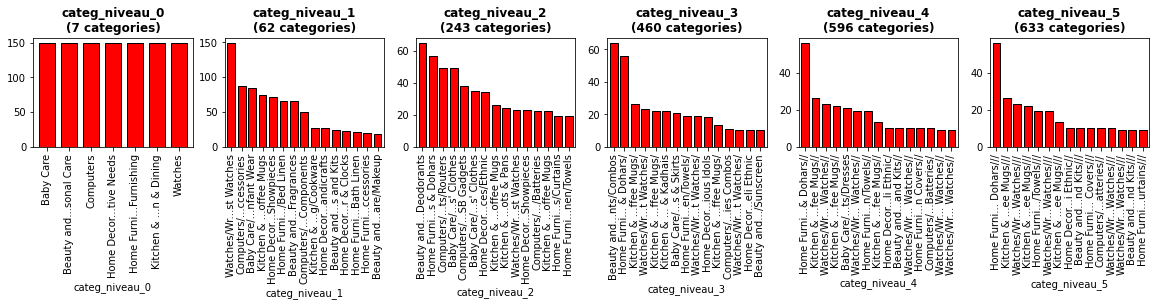

In [159]:
shorten_label = 10
n_first = 15
fig = plt.figure(figsize=(20,2))
for i, col in enumerate(df_categ.columns,1):
    # plot the graphs
    ax = fig.add_subplot(1,len(df_categ.columns), i)
    ser = df_categ.groupby(col).size().sort_values(ascending=False)
    ser[0:n_first].plot.bar(width=0.75, color='red', ec='k', ax=ax)
    # shorten the labels
    thr = int(shorten_label)
    lab_x = [item.get_text() for item in ax.get_xticklabels()]
    short_lab_x = [s[:thr]+'...'+s[-thr:] if len(s)>thr else s for s in lab_x]
    ax.axes.set_xticklabels(short_lab_x)
    # set title
    ax.set_title(col+f'\n({ser.shape[0]} categories)', fontweight='bold')

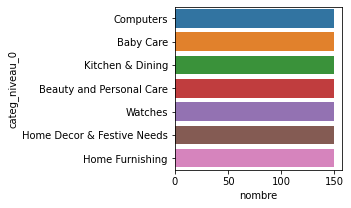

In [160]:
cat_niveau_0= pd.DataFrame(df_categ['categ_niveau_0'].value_counts()).reset_index()
cat_niveau_0.columns = ['categ_niveau_0', 'nombre']

fig = plt.figure(figsize=(3,3))
ax = sns.barplot(data = cat_niveau_0, y= 'categ_niveau_0', x= 'nombre')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.savefig("repartition_categ_niveau_O", orientation='portrait',bbox_inches='tight')  
plt.show()

In [161]:
# Extraire les sous catégories de niveau 0 
dict_cat = {'Home Furnishing': 'furnishing',
            'Baby Care': 'baby', 
            'Watches': 'watches',
            'Home Decor & Festive Needs': 'decor',
            'Kitchen & Dining': 'kitchen',
             'Beauty and Personal Care': 'beauty',
             'Computers': 'computers'}

                                         

df_categ['category'] = \
    df_categ['categ_niveau_0'].map(dict_cat)

# Check point
df_categ['category'].unique()

array(['furnishing', 'baby', 'watches', 'decor', 'kitchen', 'beauty',
       'computers'], dtype=object)

### 5.Création d’un corpus pour le nom des produits et leurs descriptions

#### Selectionner les colonnes utiles 

In [162]:
# Extraire les données utiles 

df_desc_categ = pd.concat([df_categ['category'],
                         data[["uniq_id","product_name", "description"]]], axis=1)

df_desc_categ =  df_desc_categ.apply(lambda x: x.astype(str).str.lower())

In [163]:
# Créer un corpus de texte pour la description 
corpus_description = ' '.join(df_desc_categ['description'].values)
corpus_description = corpus_description.lower()
print(color.BOLD + color.RED + "Nombre total des mots dans le corpus de description : ", len(corpus_description.split()))
#print(corpus_description[:300])



# Créer un corpus de texte pour le nom des produits 
corpus_product = ' '.join(df_desc_categ['product_name'].values)
corpus_product = corpus_product.lower()
print(color.BOLD + color.BLUE + "Nombre total des mots dans le corpus du nom des produit : ", len(corpus_product.split()))
#print(corpus_product[:300])

Nombre total des mots dans le corpus de description :  80013
Nombre total des mots dans le corpus du nom des produit :  7631


### 6. Prétraitement des textes à l’aide de NLTK (Natural Language Toolkit) 

### préprocess du texte  avec NLTK
 
- Texte preprocessing : ( supprimer les ponctuation, les espace blanc multiple , convertir au minuscule.. )
- Standardisation des textes : Tokenization, supprimer les stopwords, Lemmatiza-tion/Stemming , POS tagging


In [164]:
import string
import nltk
import re
import spacy


from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.snowball import EnglishStemmer
from nltk.stem.snowball import SnowballStemmer
from spacy.lemmatizer import Lemmatizer, ADJ, NOUN, VERB
from nltk.tokenize import word_tokenize


from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS  # une liste plus complète que celle de nltk

from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer, TfidfTransformer

In [165]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\faeze\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\faeze\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\faeze\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\faeze\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [166]:
# Créer une liste des stop words : sw_english + les mots avec 2 caractères + Lettre unique

tokenizer = nltk.RegexpTokenizer(r'\w+')

# Tokenisation des corpus 
tokenized_corpus_desc = tokenizer.tokenize(corpus_description)
tokenized_corpus_product = tokenizer.tokenize(corpus_product)

# Ne pas conserver les lettre unique et les mots ayant moins de 3 caratères
two_carac_word1 = [word for word in tokenized_corpus_desc if len(word)<3]
two_carac_word2 = [word for word in tokenized_corpus_product  if len(word)<3]

# Convertir minuscule
#two_carac_word1_minus = [s.lower() for s in two_carac_word1]
#two_carac_word2_minus = [s.lower() for s in two_carac_word2]

###Stopword en anglais
english_sw = nltk.corpus.stopwords.words('english')

#Liste des lettre unique
lettre_unique = list(string.ascii_lowercase)


# Créer une liste des stopword combiné
combined_sw = list(set(english_sw + lettre_unique +two_carac_word1 + two_carac_word2 + list(ENGLISH_STOP_WORDS)))

In [167]:
def preprocess_string(str_arg):
   # Prendre uniquement les alphabet
    cleaned_str = re.sub('[^a-z\s]+', ' ', str_arg,
                         flags=re.IGNORECASE)  # every char except alphabets is replaced
    # remplacer multiple espaces blanc par un seul 
    cleaned_str = re.sub('(\s+)', ' ', cleaned_str)
    
    # convertir au minuscule 
    cleaned_str = cleaned_str.lower()
    
   #Supprimez les espaces au début et à la fin de string :
    cleaned_str = cleaned_str.strip()  

    # Le texte sous forme d'un texte tokenisé
    return cleaned_str  

In [168]:
# Appliquer la fonction de "preprocess_string" sur les deux corpus 

df_desc_categ['product_name'] = df_desc_categ['product_name'].apply(preprocess_string)
df_desc_categ['description'] = df_desc_categ['description'].apply(preprocess_string)

In [169]:
# Fonction pour le nettoyage des texte

def corpus_cleaning (document,lemmatizer=None, stemmer = None, keep_tags=None) :
    
   # 1 - tokenisation de chaque description
    #tokenizer = nltk.RegexpTokenizer(r'[A-Za-z]+')
    tokenizer = RegexpTokenizer(r'\w+')                        
    li_words = tokenizer.tokenize(document)  
    
    
    #2-  Supprimer les stopwords       
    li_words= [s for s in li_words if s not in combined_sw]    
        # 5 - conserver certain tags
    
     # 3 - lemmatizing ou stemming
    if lemmatizer is not None:
        lem_doc = lemmatizer(' '.join(li_words))
        li_words = [token.lemma_ for token in lem_doc]
    elif stemmer is not None:  
        li_words = [stemmer.stem(s) for s in li_words] 
    
     # conserver certains tags         
    if keep_tags is not None:
        li_words = [word for word,tag in  nltk.pos_tag(li_words) if tag in keep_tags]   
    
        
    return li_words

In [170]:
# Créer un nouveau df pour les "cleand corpus"
df_cleaned = df_desc_categ[['category', 'product_name', 'description']]


In [171]:
#stemmer = SnowballStemmer(language='english')
stemmer = EnglishStemmer()
#stemmer = PorterStemmer()
lemmatizer = spacy.load('en', disable=['parser', 'ner'])
keep_tags = ['NN','JJ'] # conserver les noms et les adjectifs
#lemmatizer = WordNetLemmatizer()
#nlp = spacy.load("en_core_web_sm")

In [172]:
#Appliquer la fonction créé 

df_cleaned['desc_clean'] = \
    df_cleaned['description'].apply(lambda x: \
                                     corpus_cleaning(x, lemmatizer = lemmatizer, stemmer = stemmer, keep_tags=keep_tags))\
                               .apply(lambda x: ' '.join(x))
                                            
                                                    

        
df_cleaned['pname_clean'] = \
    df_cleaned['product_name'].apply(lambda x: \
                                     corpus_cleaning(x, lemmatizer = lemmatizer,
                                                     stemmer = stemmer, keep_tags=keep_tags))\
                               .apply(lambda x: ' '.join(x))        

**checkpoint**

In [173]:
# Comparer la  'description' avant et après le prétraitement 
print(color.BOLD + color.RED +  "avant nettoyage:" + color.END)
print(df_cleaned['description'][20])
print(color.BOLD + color.RED + "après nettoyage:" + color.END)
print(df_cleaned["desc_clean"][20])

print("***")
# Comparer le 'product_name' avant et après le prétraitement 

print(color.BOLD + color.BLUE + "Avant nettoyage:" + color.END)
print(df_cleaned['product_name'][10])
print(color.BOLD + color.BLUE + "Après nettoyage:" + color.END)
print(df_cleaned["pname_clean"][10])

avant nettoyage:
skmei ad dark orange sports analog digital watch for men boys buy skmei ad dark orange sports analog digital watch for men boys ad dark orange online at rs in india only at flipkart com digital chronograph alarm watch light function date month display great discounts only genuine products day replacement guarantee free shipping cash on delivery
après nettoyage:
skmei ad dark orange digital watch man skmei ad dark orange digital watch man ad dark orange online india flipkart com digital chronograph alarm watch light function date month display great discount genuine product day replacement guarantee free shipping cash delivery
***
Avant nettoyage:
calibro sw analog digital watch for men boys
Après nettoyage:
calibro analog digital watch man boy


In [174]:
# supprimer les colonnes non nettoyées de "description" et "nom de produit"
df_cleaned=df_cleaned.drop(['product_name', 'description'], axis = 1)

### Analyse descriptive des corpus de nom des produits et les description

In [175]:
# Création des corpus pour description & product_name après le prétraitement 

corpus_description_cleand= ' '.join(df_cleaned['desc_clean'].values)
corpus_product_cleand = ' '.join(df_cleaned['pname_clean'].values)

#### Les mots les plus fréquent dans chaque corpus 

In [176]:
# Les 20 mots les plus fréquants
tokens_description_cleand = tokenizer.tokenize(corpus_description_cleand)


tokens_product_cleanad = tokenizer.tokenize(corpus_product_cleand)


print(Counter(tokens_description_cleand).most_common(20),"\n")

print(Counter(tokens_product_cleanad).most_common(20))


[('product', 858), ('free', 618), ('delivery', 567), ('genuine', 564), ('shipping', 564), ('cash', 564), ('price', 561), ('replacement', 558), ('day', 553), ('guarantee', 473), ('com', 466), ('flipkart', 460), ('mug', 430), ('specification', 370), ('color', 369), ('design', 359), ('feature', 338), ('watch', 337), ('online', 336), ('type', 317)] 

[('watch', 132), ('analog', 119), ('set', 106), ('showpiece', 96), ('combo', 93), ('baby', 92), ('man', 80), ('mug', 75), ('ceramic', 74), ('girl', 64), ('usb', 60), ('woman', 55), ('cotton', 54), ('boy', 51), ('print', 49), ('single', 45), ('double', 40), ('abstract', 38), ('laptop', 38), ('light', 33)]


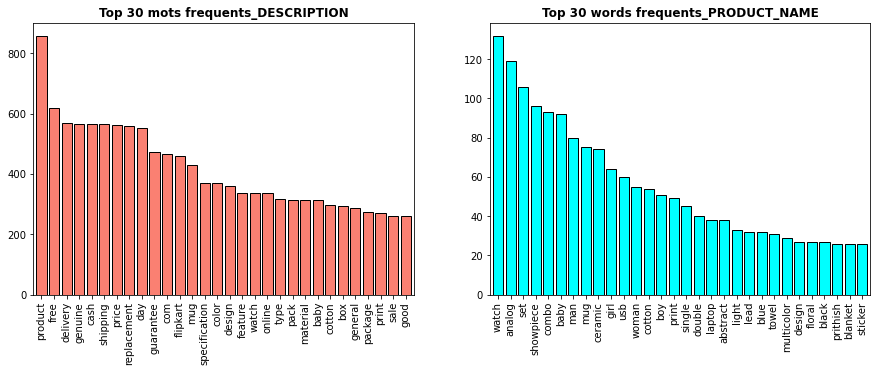

In [177]:
# tokenizing les mots dans le corpus nettoyé


# la fréquance de chaques mots 
ser_freq_prname = pd.Series(nltk.FreqDist(tokens_product_cleanad))
ser_freq_descr = pd.Series(nltk.FreqDist(tokens_description_cleand))

fig = plt.figure(figsize=(15,5))

# plot 
ax = fig.add_subplot(1,2,1)
ser_freq_descr.sort_values(ascending=False)[0:30].plot.bar(width=0.8,
                                                          color='salmon',
                                                          ec='k',
                                                          ax=ax)
ax.set_title("Top 30 mots frequents_DESCRIPTION", fontweight='bold')


ax = fig.add_subplot(1,2,2)
ser_freq_prname.sort_values(ascending=False)[0:30].plot.bar(width=0.8,
                                                           color='cyan',
                                                           ec='k',
                                                           ax=ax)
ax.set_title("Top 30 words frequents_PRODUCT_NAME", fontweight='bold')
plt.show()

#### Nuage des mots par catégorie

In [178]:
# Fonction pour visualiser le nuage des mots de "n_top_word" pour 
#une série de textes (non tokenisés) de regroupment 



def plot_wordclouds_from_gb(gb, n_top_words, n_rows=1, figsize=(20,10),
                             backgnd_color='black', cmap='Dark2',
                            random_state=None):

    fig = plt.figure(figsize=figsize)

#extrait les n premiers mots et trace un nuage de mots des (n_top_mots)
#meilleurs mots pour chaque sujet.    
    
    for i, tup in enumerate(gb,1):
        n_topic, ser_texts = tup
        
        # creation of a corpus of all the cleaned descriptions and product_names
        corpus = ' '.join(ser_texts.values)
        
        # tokenizing the words in the cleaned corpus
        #tokenizer = nltk.RegexpTokenizer(r'[a-z]+')
        tokenizer=  RegexpTokenizer(r'\w+')
        li_words = tokenizer.tokenize(corpus)
        
        # counting frequency of each word
        ser_freq = pd.Series(nltk.FreqDist(li_words))

        wc = WordCloud(stopwords=None, background_color=backgnd_color,
                        colormap=cmap, max_font_size=150,
                        random_state=14)
        ser_topic = ser_freq\
            .sort_values(ascending=False)[0:n_top_words]
        wc.generate(' '.join(list(ser_topic.index)))

        n_tot = len(gb)
        n_cols = (n_tot//n_rows)+((n_tot%n_rows)>0)*1
        ax = fig.add_subplot(n_rows,n_cols,i)
        plt.imshow(wc, interpolation="bilinear")
        plt.axis("off")
        plt.tight_layout()
        plt.title(n_topic, fontweight='bold')

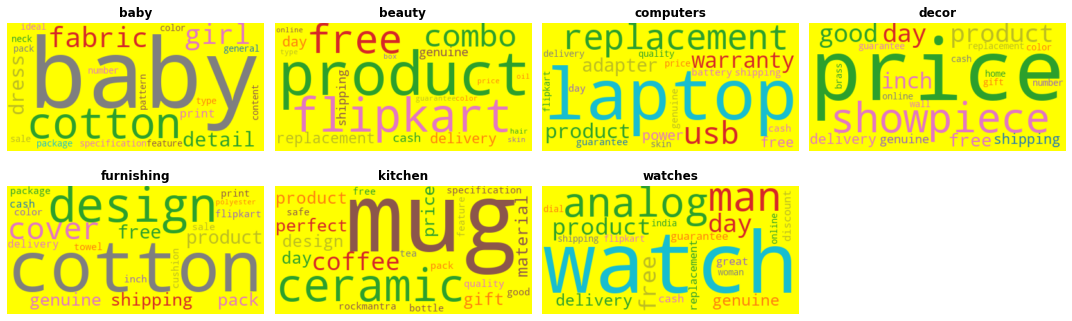

In [179]:
# regroupment des descriptionS par catégorie 

categ_description = df_cleaned.groupby('category')['desc_clean']


# Visuliser les nuage des mots des description par caétegorie 
plot_wordclouds_from_gb(categ_description,n_top_words=20, n_rows=2, figsize=(15,5),
                        backgnd_color='yellow', cmap='tab10', random_state=14)

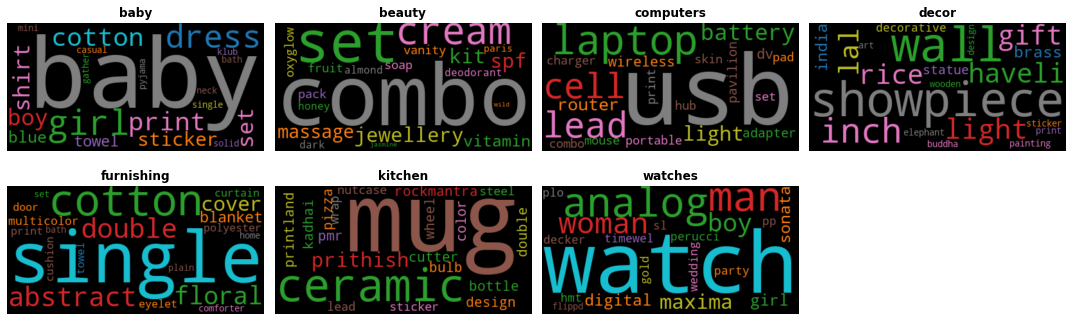

In [180]:
# Visuliser les nuages des mots deu nom des produits par catégorie

categ_product = df_cleaned.groupby('category')['pname_clean']

# Visuliser les nuage des mots des description par caétegorie 
plot_wordclouds_from_gb(categ_product,n_top_words=20, n_rows=2, figsize=(15,5),
                        backgnd_color='black', cmap='tab10', random_state=14)

#### Analyse n-gram pour capter des informations relatives à la cooccurrence des mots


In [181]:
from nltk import ngrams

bigrams_product = [w for w in  ngrams(tokens_product_cleanad,n=2)]


bi_tokens_product = ['_'.join(w) for w in bigrams_product]
print(color.BOLD + color.BLUE + "Top_30 bigrams dans nom des produits:"+ color.END)
print(bi_tokens_product[:30])

Top_30 bigrams dans nom des produits:
['elegance_polyester', 'polyester_multicolor', 'multicolor_abstract', 'abstract_eyelet', 'eyelet_door', 'door_curtain', 'curtain_sathiyas', 'sathiyas_cotton', 'cotton_bath', 'bath_towel', 'towel_eurospa', 'eurospa_cotton', 'cotton_terry', 'terry_face', 'face_towel', 'towel_set', 'set_santosh', 'santosh_royal', 'royal_fashion', 'fashion_cotton', 'cotton_print', 'print_size', 'size_double', 'double_bedsheet', 'bedsheet_jaipur', 'jaipur_print', 'print_cotton', 'cotton_floral', 'floral_king', 'king_size']


In [182]:
bigrams_desc = [w for w in ngrams(tokens_description_cleand, n=2)]

bi_tokens_desc= ['_'.join(w) for w in bigrams_desc]

print(color.BOLD + color.RED + "Top_30 bigrams dans description:"+ color.END)
print(bi_tokens_desc[:30])

Top_30 bigrams dans description:
['key_feature', 'feature_elegance', 'elegance_polyester', 'polyester_multicolor', 'multicolor_abstract', 'abstract_eyelet', 'eyelet_door', 'door_floral', 'floral_curtain', 'curtain_elegance', 'elegance_polyester', 'polyester_multicolor', 'multicolor_abstract', 'abstract_eyelet', 'eyelet_door', 'door_curtain', 'curtain_pack', 'pack_price', 'price_curtain', 'curtain_enhance', 'enhance_look', 'look_interior', 'interior_curtain', 'curtain_high', 'high_quality', 'quality_polyester', 'polyester_fabric', 'fabric_feature', 'feature_eyelet', 'eyelet_style']


In [183]:
tri_desc = [w for w in ngrams(tokens_description_cleand, n=3)]

bi_tokens_desc= ['_'.join(w) for w in bigrams_desc]

print(color.BOLD + color.RED + "Top_30 bigrams dans description:"+ color.END)
print(bi_tokens_desc[:30])

Top_30 bigrams dans description:
['key_feature', 'feature_elegance', 'elegance_polyester', 'polyester_multicolor', 'multicolor_abstract', 'abstract_eyelet', 'eyelet_door', 'door_floral', 'floral_curtain', 'curtain_elegance', 'elegance_polyester', 'polyester_multicolor', 'multicolor_abstract', 'abstract_eyelet', 'eyelet_door', 'door_curtain', 'curtain_pack', 'pack_price', 'price_curtain', 'curtain_enhance', 'enhance_look', 'look_interior', 'interior_curtain', 'curtain_high', 'high_quality', 'quality_polyester', 'polyester_fabric', 'fabric_feature', 'feature_eyelet', 'eyelet_style']


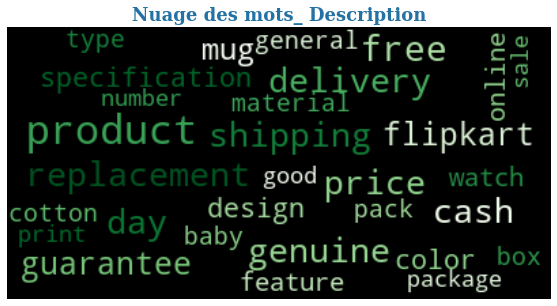

In [184]:
# Créer un objet de nouage des mots
wordcloud = WordCloud(max_words=30, background_color="black",
                    max_font_size = 30, colormap="Greens", 
                    collocations=False)


# Génerer a nouage des mots pour la description 
wc_desc = wordcloud.generate(corpus_description_cleand)

plt.figure(figsize = (10, 5)) 
plt.imshow(wc_desc,interpolation="bilinear")
plt.title("Nuage des mots_ Description", fontdict = font_title1)
#plt.tight_layout(pad = 0) 
plt.axis("off")
plt.show()

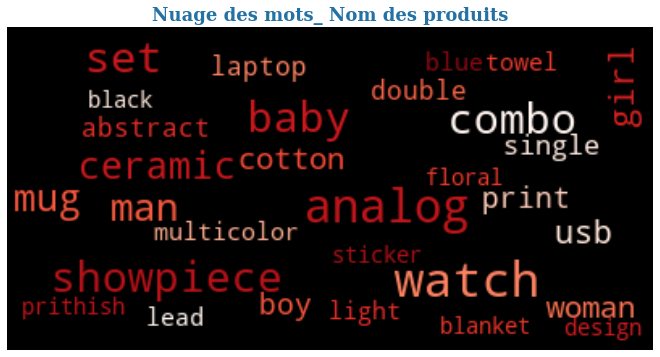

In [185]:
wordcloud = WordCloud(max_words=30, background_color="black",
                    max_font_size = 30, colormap="Reds", 
                    collocations=False)

# Génerer un nouage des mots pour le nom des produits
wc_product= wordcloud.generate(corpus_product_cleand)


plt.figure(figsize = (10, 5)) 
plt.imshow(wc_product,interpolation="bilinear")
plt.title("Nuage des mots_ Nom des produits", fontdict = font_title2)

plt.tight_layout(pad = 0) 
plt.axis("off")
plt.show()

In [186]:
# Créer un df des fréquence des mots de descriptions et nom des produits
df_freq_mots = pd.concat([ser_freq_descr.to_frame(name='desc'),
                     ser_freq_prname.to_frame(name='pname')],
                    axis=1).fillna(0)


df_freq_mots['total'] = df_freq_mots['desc'] + df_freq_mots['pname']

#### Création d’un corpus total avec le nom des produits et leur descriptions

Nmbr de mots dans le corpus_total : 3776



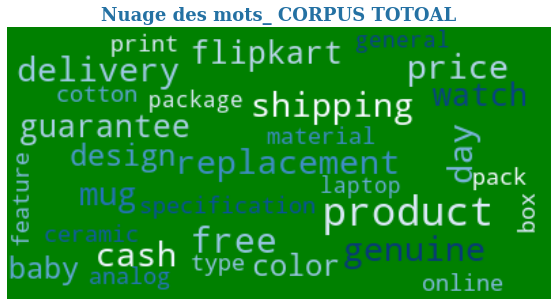

In [187]:
df_cleaned["text"] = df_cleaned["desc_clean"] + " " + df_cleaned["pname_clean"]


corpus_total= ' '.join(df_cleaned["text"].values)
total_corpus_tokenized = tokenizer.tokenize(corpus_total)
print(color.BOLD +'Nmbr de mots dans le corpus_total :',len(set(total_corpus_tokenized)))
print()


# Génerer un nouage des mots pour le nom des produits
wordcloud = WordCloud(max_words=30, background_color="Green",
                    max_font_size = 30, colormap="Blues", 
                    collocations=False)

wc_product= wordcloud.generate(corpus_total)


plt.figure(figsize = (10, 5)) 
plt.imshow(wc_product,interpolation="bilinear")
plt.title("Nuage des mots_ CORPUS TOTOAL", fontdict = font_title1)

#plt.tight_layout(pad = 0) 
plt.axis("off")
plt.show()

#### Affichage des mots les plus fréquent pour identifier les mots non-significatifs

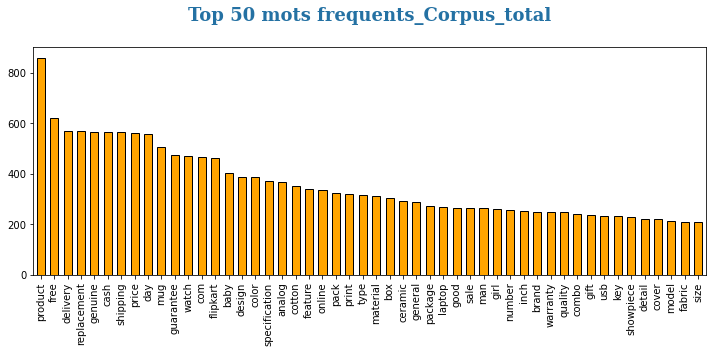

In [188]:
ser_freq_total= pd.Series(nltk.FreqDist(total_corpus_tokenized))

fig = plt.figure(figsize=(10,5))

# plot 

ax=ser_freq_total.sort_values(ascending=False)[0:50].plot.bar( width=0.6,
                                                          color='orange',
                                                          ec='k') 


ax.set_title("Top 50 mots frequents_Corpus_total\n", fontdict = font_title2)
plt.tight_layout()
plt.show()

In [189]:
ser_freq_total.sort_values(ascending=False)[0:100].to_frame(name='total').index

Index(['product', 'free', 'delivery', 'replacement', 'genuine', 'cash', 'shipping', 'price', 'day', 'mug', 'guarantee', 'watch', 'com', 'flipkart', 'baby', 'design', 'color', 'specification', 'analog', 'cotton', 'feature', 'online', 'pack', 'print', 'type', 'material', 'box', 'ceramic', 'general', 'package', 'laptop', 'good', 'sale', 'man', 'girl', 'number', 'inch', 'brand', 'warranty', 'quality', 'combo', 'gift', 'usb', 'key', 'showpiece', 'detail', 'cover', 'model', 'fabric', 'size', 'woman',
       'great', 'india', 'multicolor', 'home', 'use', 'perfect', 'skin', 'dimension', 'coffee', 'ideal', 'boy', 'black', 'content', 'water', 'power', 'blue', 'battery', 'light', 'adapter', 'high', 'discount', 'single', 'towel', 'care', 'dress', 'set', 'lead', 'double', 'pattern', 'wall', 'style', 'easy', 'round', 'length', 'sticker', 'wash', 'width', 'casual', 'body', 'fit', 'white', 'shape', 'craft', 'steel', 'dial', 'safe', 'abstract', 'floral', 'cushion'],
      dtype='object')

#### Supprimer les stopwords de domains

In [190]:
domain_stopwords =['product', 'free','delivery', 'cash', 'genuine','replacement', 'guarantee', 'price', 
                   'color', 'shipping', 'shippment','number', 'design', 'product', 'brand', 
                   'quality', 'type', 'pack', 'model', 'size', "free", 'feature', 'com',
                   'package', 'material', 'multicolor', 'gift', 'online','style',
                   'code', 'collection', 'color', 'model', 'flipkart', 'sale', 'general', 'com', 
                   'day', 'specification']


df_cleaned['text_final'] = df_cleaned["text"].apply(lambda x: ' '.join([word for word in x.split() \
                                                                        if word not in (domain_stopwords)]))

df_cleaned['final_desc'] = df_cleaned['desc_clean'].apply(lambda x: ' '.join([word for word in x.split() \
                                                                        if word not in (domain_stopwords)]))

df_cleaned['pname_final'] = df_cleaned['pname_clean'].apply(lambda x: ' '.join([word for word in x.split() \
                                                                        if word not in (domain_stopwords)]))



corpus_final= ' '.join(df_cleaned['text_final'].values)
print('Nombre des mots uniques: {}'.format(len(set(tokenizer.tokenize(corpus_final))),"\n"))
print("Nombre des mots unique avant supprimer SW de domain: {}". format(len(set(tokenizer.tokenize(corpus_total))),"\n"))


print(color.BOLD + color.DARKCYAN + "Top_20 mots avant supprimer les SW de domain:"+ color.END)
print(Counter(tokenizer.tokenize(corpus_total)).most_common(20), '\n')
print(color.BOLD + color.YELLOW + "Top_20 mots après supprimer les SW de domain:"+ color.END)
print(Counter(tokenizer.tokenize(corpus_final)).most_common(20))


Nombre des mots uniques: 3743
Nombre des mots unique avant supprimer SW de domain: 3776
Top_20 mots avant supprimer les SW de domain:
[('product', 858), ('free', 622), ('replacement', 567), ('delivery', 567), ('genuine', 564), ('shipping', 564), ('cash', 564), ('price', 561), ('day', 556), ('mug', 505), ('guarantee', 473), ('watch', 469), ('com', 466), ('flipkart', 460), ('baby', 404), ('design', 386), ('color', 385), ('specification', 370), ('analog', 366), ('cotton', 352)] 

Top_20 mots après supprimer les SW de domain:
[('mug', 505), ('watch', 469), ('baby', 404), ('analog', 366), ('cotton', 352), ('print', 320), ('box', 303), ('ceramic', 292), ('laptop', 267), ('good', 265), ('man', 262), ('girl', 260), ('inch', 251), ('warranty', 246), ('combo', 241), ('usb', 232), ('key', 231), ('showpiece', 229), ('cover', 221), ('detail', 221)]


### Analyse descriptive sur le corpus final  

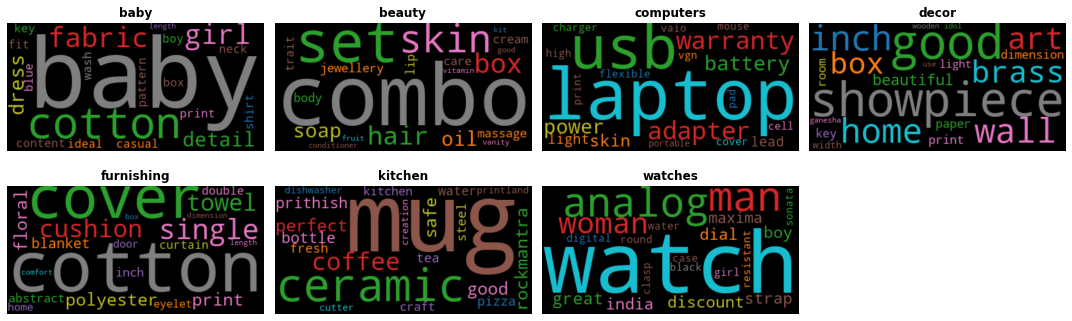

In [191]:
text_final = df_cleaned.groupby('category')['text_final']

# Visuliser les nuage des mots des description par caétegorie 
plot_wordclouds_from_gb(text_final,n_top_words=20, n_rows=2, figsize=(15,5),
                        backgnd_color='black', cmap='tab10', random_state=14)

#### Analyse n-gram pour capter des informations relatives à la cooccurrence des mots

In [192]:
ngram_model_token = Counter(tokenizer.tokenize(corpus_final))

bigrams_corpus_total = [w for w in  ngrams(ngram_model_token,n=2)]


bi_tokens_total = ['_'.join(w) for w in bigrams_corpus_total]
print(color.BOLD + color.PURPLE + "Top_30 bigrams dans le corpus final:"+ color.END)
print(bi_tokens_total[:30])

Top_30 bigrams dans le corpus final:
['key_elegance', 'elegance_polyester', 'polyester_abstract', 'abstract_eyelet', 'eyelet_door', 'door_floral', 'floral_curtain', 'curtain_enhance', 'enhance_look', 'look_interior', 'interior_high', 'high_fabric', 'fabric_stitch', 'stitch_metal', 'metal_make', 'make_room', 'room_environment', 'environment_romantic', 'romantic_love', 'love_ant', 'ant_wrinkle', 'wrinkle_anti', 'anti_shrinkage', 'shrinkage_elegant', 'elegant_apparance', 'apparance_home', 'home_modernistic', 'modernistic_appeal', 'appeal_surreal', 'surreal_attention']


In [193]:
trigrams_desc = [w for w in ngrams(tokens_description_cleand, n=3)]

tri_grams= ['_'.join(w) for w in trigrams_desc]

print(color.BOLD + color.RED + "Top_30 bigrams dans description:"+ color.END)
print(tri_grams[:50])

Top_30 bigrams dans description:
['key_feature_elegance', 'feature_elegance_polyester', 'elegance_polyester_multicolor', 'polyester_multicolor_abstract', 'multicolor_abstract_eyelet', 'abstract_eyelet_door', 'eyelet_door_floral', 'door_floral_curtain', 'floral_curtain_elegance', 'curtain_elegance_polyester', 'elegance_polyester_multicolor', 'polyester_multicolor_abstract', 'multicolor_abstract_eyelet', 'abstract_eyelet_door', 'eyelet_door_curtain', 'door_curtain_pack', 'curtain_pack_price', 'pack_price_curtain', 'price_curtain_enhance', 'curtain_enhance_look', 'enhance_look_interior', 'look_interior_curtain', 'interior_curtain_high', 'curtain_high_quality', 'high_quality_polyester', 'quality_polyester_fabric', 'polyester_fabric_feature', 'fabric_feature_eyelet', 'feature_eyelet_style', 'eyelet_style_stitch', 'style_stitch_metal', 'stitch_metal_make', 'metal_make_room', 'make_room_environment', 'room_environment_romantic', 'environment_romantic_love', 'romantic_love_curtain', 'love_curt

In [194]:
fivegrams_desc = [w for w in ngrams(tokens_description_cleand, n=5)]

fivegrams= ['_'.join(w) for w in fivegrams_desc]

print(color.BOLD + color.RED + "Top_30 bigrams dans description:"+ color.END)
print(fivegrams[:20])

Top_30 bigrams dans description:
['key_feature_elegance_polyester_multicolor', 'feature_elegance_polyester_multicolor_abstract', 'elegance_polyester_multicolor_abstract_eyelet', 'polyester_multicolor_abstract_eyelet_door', 'multicolor_abstract_eyelet_door_floral', 'abstract_eyelet_door_floral_curtain', 'eyelet_door_floral_curtain_elegance', 'door_floral_curtain_elegance_polyester', 'floral_curtain_elegance_polyester_multicolor', 'curtain_elegance_polyester_multicolor_abstract', 'elegance_polyester_multicolor_abstract_eyelet', 'polyester_multicolor_abstract_eyelet_door', 'multicolor_abstract_eyelet_door_curtain', 'abstract_eyelet_door_curtain_pack', 'eyelet_door_curtain_pack_price', 'door_curtain_pack_price_curtain', 'curtain_pack_price_curtain_enhance', 'pack_price_curtain_enhance_look', 'price_curtain_enhance_look_interior', 'curtain_enhance_look_interior_curtain']


# Modélisation

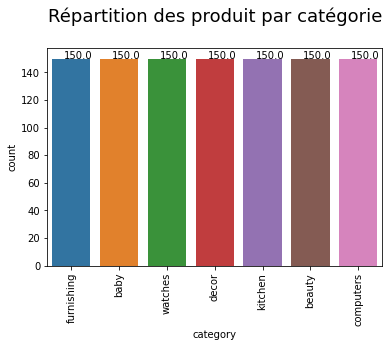

In [195]:
ax = sns.countplot(x="category", data=df_cleaned)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title("Répartition des produit par catégorie\n", fontsize= 18)
plt.savefig("repartition_cat", orientation='portrait',bbox_inches='tight')  

plt.show()


- On a pu détecter  7 catégories principales (de niveau 0)
- La répartition des produits par catégorie niveau 0 montre aussi qu'ils sont répartis d'une façon équilibrées : 150 produits par catégorie. 
- Cela nous permettra aussi de juger de la qualité de notre clustering en comparant les labels obtenus aux catégories à l'aide du score de l'Adjusted Rand Index.
**Rappel** : 
- Le score Rand ajusté est introduit pour déterminer si les résultats de deux grappes sont similaires l'un à l'autre.
- Dans la formule, le « RI » représente l'indice de rand, qui calcule une similarité entre les résultats de deux clusters en prenant tous les points identifiés dans le même cluster. 
- Cette valeur est égale à 0 lorsque les points sont attribués dans des clusters de manière aléatoire et elle est égale à 1 lorsque les résultats des deux clusters sont identiques
- Cette métrique est utilisée pour évaluer si les résultats du cluster de similarité à dimension réduite sont similaires les uns aux autres.

**La démarche à suivre  :** 

- Après avoir nettoyé et tokeniser les description, il faut générer une représentaton vectorieller des documents. 
- Cela concerne  le mappage de documents à partir de mots dans des vecteurs numériques. 

- Appliquer un algorithme de clustering sur les vecteurs de document : cela nécessite de sélectionner et d'appliquer un algorithme de clustering pour trouver les meilleurs groupes possibles en utilisant les vecteurs de document 
- Matrice de confusion
- Calcul de ARI : Adjusted Rand Index 

In [196]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.preprocessing import FunctionTransformer
from sklearn import preprocessing
from sklearn import manifold, decomposition
import matplotlib.cm as cm
from sklearn.metrics import confusion_matrix,classification_report

from sklearn.cluster import KMeans

from sklearn import cluster, metrics

from sklearn.metrics import silhouette_samples, silhouette_score


from sklearn.preprocessing import StandardScaler,  Normalizer

from sklearn import manifold, decomposition

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV


import time

#### Création des fonctions communes

In [197]:
# Fonction pour la réduction de la dimensionnalité en 2D avec Tsne 
def tsne(X):

    t = time.time()
    tsne = manifold.TSNE(n_components=2,
                         perplexity=30,
                         n_iter=2000, init='random', random_state=6)
    X_tsne = tsne.fit_transform(X)

    columns = []
    for i in range(1, 3):
        columns.append('tsne'+str(i))
    df_tsne = pd.DataFrame(X_tsne, columns=columns)

    d = time.time() - t
    print('dim after t-SNE : ', X_tsne.shape)
    print('timing : ', '%15.2f' % d, 's')
    return X_tsne

In [198]:
# fonction de réassignation des clusters en maximisant la diagonale de la matrice de confusion'''
def conf_mat_transform(conf_mat) :
    

    conf_mat_temp = 1 /(conf_mat + 0.001)
    
 
    from scipy.optimize import linear_sum_assignment
    row_ind, col_ind = linear_sum_assignment(conf_mat_temp)

    conf_mat_transform = conf_mat[:, col_ind]
    
    corresp = col_ind.tolist()
    print ("Correspondance des clusters : ", corresp)
    return corresp, conf_mat_transform

In [199]:
# fonction pour implémenter le clustering (Kmeans) après l'extraction des features 
def get_clusters(X, n) : 
    scaler = Normalizer()
    X_normalized= scaler.fit_transform(X)

    cls = KMeans(n_clusters=n, random_state=0, init='k-means++', n_init=10, max_iter=100)
    cls.fit(X_normalized)
    labels = cls.labels_
    centers = pd.DataFrame(cls.cluster_centers_)
    return labels, centers


In [200]:
def get_proportion(y_pred) :
    proportion =  pd.Series(y_pred).value_counts()/10.5
    print(proportion)


In [201]:

dict_code = dict(zip(dict_cat.values(), range(0,7)))
df_cleaned["cat_code"]= df_cleaned['category'].map(dict_code)
li_cat = df_cleaned['category'].unique().tolist()

In [202]:
# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, true_label,  labels) :
    fig = plt.figure(figsize=(15,5))
    
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c = true_label, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=li_cat, loc="best", title="Categorie")
    plt.title('Représentation par catégories réelles', fontdict= font_title1)
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('Représentation par clusters', fontdict= font_title2)
    
    plt.show()


## Représentation vectorielle du texte 

- Les technique de  l'extraction des features les techniques : 
- **BagOfWOrds**
- **TFIDF**
- **Word2Vec**
- **Universal Sentence Embedding)**

### BagOfWords

- **Rappel**
- La représentation par sac de mots (ou bag of words en anglais) est une description de document 
- Une représentation bag-of-words classique est  celle dans laquelle on représente chaque document par un vecteur de la taille du vocabulaire |V| et on utilisera la matrice composée de l’ensemble de ces N documents qui forment le corpus comme entrée de nos algorithmes. 

In [203]:
 #min_df = 5 : ne pas tenir en compte les mots présents dans moins de 5 documents
# max_df = 0.35 tenir en compte les mots présents dans maximum de 35% des documents 

bow = CountVectorizer(stop_words = 'english', ngram_range = (1, 1), max_df= 0.35, min_df =5)  
#matrix_bow = vectorizer.fit_transform(df_cleaned['final_desc'])

X_bow = bow.fit_transform(df_cleaned['text_final'])
X_bow.toarray().shape

(1050, 752)

#### Afficher la fréquence des mots par catégories 

In [204]:
df_bow =  pd.DataFrame(X_bow.toarray(), columns = bow.get_feature_names(), 
                         index = df_cleaned.index)
df_bow['category'] = df_cleaned['category']

most_common_words_bow = df_bow.drop(columns='category')\
                    .T.sum(axis = 1)\
                    .sort_values(ascending = False)\
                    .head(50).index.tolist()


list1_bow = most_common_words_bow[:50]



df_bow_by_cat = df_bow.groupby(['category']) 

df1_bow = df_bow_by_cat.agg('sum')[list1_bow[::-1]]




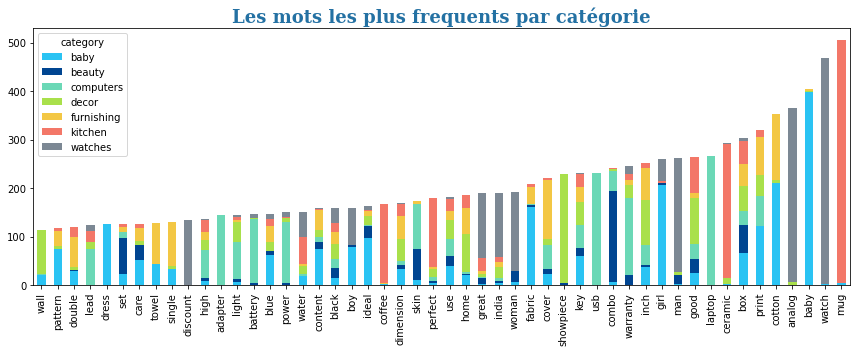

In [205]:
ax = df1_bow.T.plot(kind = 'bar', stacked=True, color = colors, figsize = (12,5), fontsize = 10)
#ax.set_xlim(0,600)
plt.title('Les mots les plus frequents par catégorie', fontdict = font_title1)


plt.savefig("bow", orientation='portrait',bbox_inches='tight')  
plt.tight_layout()
plt.show()


In [206]:
# Réduction dimension avec SVD en conservant 0.99 de variance 

svd_bow = TruncatedSVD(n_components=750, random_state=42)
X_bow_svd = svd_bow.fit_transform(X_bow)

cum_variance_bow = np.cumsum(svd_bow.explained_variance_ratio_)
idx_bow = np.argmax(cum_variance_bow > .99)

svd = TruncatedSVD(n_components=idx_bow, random_state=42)
X_bow_svd = svd.fit_transform(X_bow)
X_bow_svd.shape

(1050, 364)

#### Clustering avec kmeans (k=7) 

In [207]:
cls_bow , center_bow = get_clusters(X_bow_svd, 7)

#### Matrice de confusion pour comparer la catégorie réelle avec les clusters obtenus 

Correspondance des clusters :  [4, 6, 1, 2, 3, 0, 5]


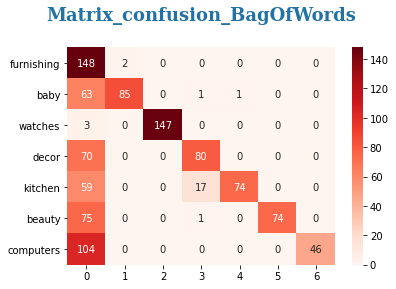

In [208]:
y_bow_cls= pd.Series(cls_bow)

df_bow['clusters']= y_bow_cls
df_bow['labels'] = df_cleaned['cat_code']
y_bow_ture = df_bow['labels']

confusion_m = confusion_matrix(y_bow_ture,y_bow_cls)


bow_corres, bow_cm = conf_mat_transform(confusion_m) 
categories= df_cleaned['category'].unique().tolist()
#plot
cm_bow_df= pd.DataFrame(bow_cm, index = categories, columns = range(0,7))
plt.figure(figsize = (6,4))
sns.heatmap(cm_bow_df, annot=True, cmap="Reds", fmt='g' )
plt.title("Matrix_confusion_BagOfWords\n", fontdict= font_title1)
plt.show()

#### Calcul de Score ARI (Adjusted Rand Index) 

In [209]:
dict_clusters_bow = dict(zip(bow_corres, range(0,7)))
y_pred_bow_transform = y_bow_cls.map(dict_clusters_bow)


# ARI
ARI_BOW= round(metrics.adjusted_rand_score(y_bow_ture, y_pred_bow_transform),2)

print(color.BOLD + color.RED + "ARI_BOW:", ARI_BOW)

LABELS_BOW = y_pred_bow_transform

ARI_BOW: 0.27


#### Reduction de la dimensionalité à l’aide de T-SNE en 2D  pour la visualisation des clusters 

dim after t-SNE :  (1050, 2)
timing :             7.39 s


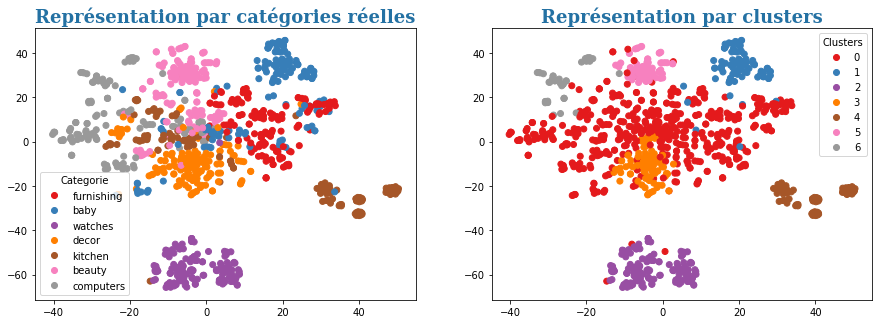

In [210]:
tsne_bow = tsne(X_bow)

TSNE_visu_fct(tsne_bow, y_bow_ture.values.tolist() , LABELS_BOW)

In [211]:
# Fonctio pour trouver le nombre optimal des clusters 
def find_optimal_clusters(data, max_k, model, string, color):
    iters = range(2, max_k+5, 1)
    
    sse = []
    for k in iters:
        sse.append(model(n_clusters=k).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    f= plt.figure(figsize=(8,5))
    ax.plot(iters, sse, marker='o', color = color)
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title(string, fontsize= 15)
    plt.tight_layout()
    plt.show()
#find_optimal_clusters(matrix_bow,5, KMeans, "SSE by Cluster Center Plot_ KMeans Model", 'blue')    

### TFIDF

- **Rappel :**
   Le technique de vectorizatio 'tf-idf' (Term-Frequency - Inverse Document Frequency) utilise comme indicateur de similarité l'inverse document frequency qui est l'inverse de la proportion de document qui contient le terme, à l'échelle logarithmique. Il est appelé logiquement « inverse document frequency » (idf).
 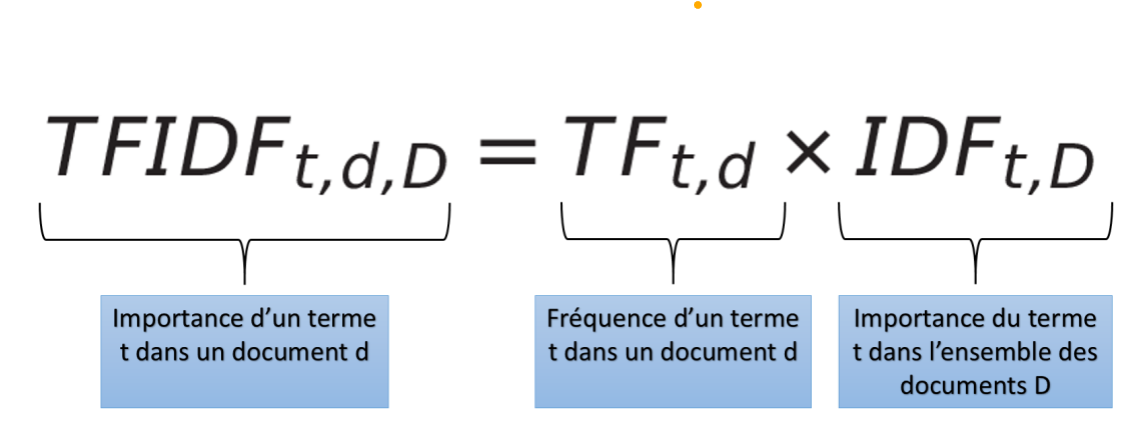

In [212]:
tfidf = TfidfVectorizer(stop_words='english',ngram_range = (1, 1), max_df= 0.35, min_df = 5)

X_tfidf = tfidf.fit_transform(df_cleaned['text_final'])


X_tfidf.toarray().shape

(1050, 752)

#### Afficher la fréquence des mots par catégories

In [213]:
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns = tfidf.get_feature_names(), 
                         index = df_cleaned.index)

#df_cleaned['category_code'] = df_cleaned['category'].map(dict_cat_code)

df_tfidf['category'] = df_cleaned['category']




df_tfidf_by_cat = df_tfidf.groupby(['category']) 

most_common_words = df_tfidf.drop(columns='category')\
                    .T.sum(axis = 1)\
                    .sort_values(ascending = False)\
                    .head(50).index.tolist()


list1_tfidf = most_common_words[:50]
#list2_tfidf = most_common_words[26:]


df1 = df_tfidf_by_cat.agg('sum')[list1_tfidf]

#df2 = df_tfidf_by_cat.agg('sum')[list2_tfidf[::-1]]

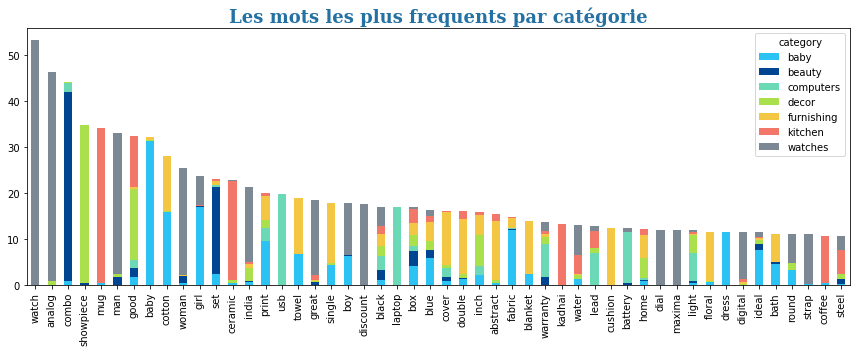

In [214]:
ax = df1.T.plot(kind = 'bar', stacked=True, color = colors, figsize = (12,5), fontsize = 10)
plt.title('Les mots les plus frequents par catégorie', fontdict = font_title2)


plt.savefig("TFIDF", orientation='portrait',bbox_inches='tight')  
plt.tight_layout()
plt.show()
#ax.set_xlim(0,50)


#ax = df2.T.plot(kind = 'barh', stacked=True, color = colors, figsize = (8,8), fontsize = 10, legend = None)
#ax.set_xlim(0,20)

In [215]:
# Réduction dimension avec SVD en conservant 0.99 de variance 

svd = TruncatedSVD(n_components=700, random_state=42)
X_svd = svd.fit_transform(X_tfidf)

cum_variance = np.cumsum(svd.explained_variance_ratio_)
idx = np.argmax(cum_variance > .99)
svd = TruncatedSVD(n_components=idx, random_state=42)
X_svd = svd.fit_transform(X_tfidf)
X_svd.shape

(1050, 429)

#### Clustering avec kmeans (k=7) 

In [216]:
cls_tfidf, center_tfidf = get_clusters(X_svd, 7)

#### Matrice de confusion pour comparer la catégorie réelle avec les clusters obtenus

Correspondance des clusters :  [2, 5, 6, 0, 4, 1, 3]


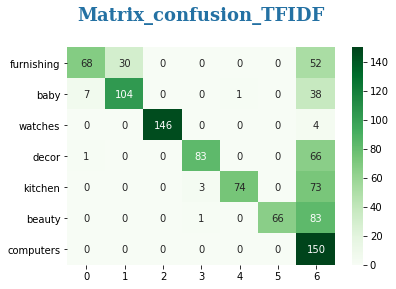

In [217]:
tfidf_cluster= pd.Series(cls_tfidf)

df_tfidf['clusters']= cls_tfidf
df_tfidf['labels'] = df_cleaned['cat_code']
y_tfidf_ture = df_tfidf['labels']

confusion_m_tfidf = confusion_matrix(y_tfidf_ture,cls_tfidf)


tfidf_corres, tfidf_cm = conf_mat_transform(confusion_m_tfidf) 

categories= df_cleaned['category'].unique().tolist()
#plot
cm_tfidf_df= pd.DataFrame(tfidf_cm, index = categories, columns = range(0,7))
plt.figure(figsize = (6,4))
sns.heatmap(cm_tfidf_df, annot=True, cmap="Greens", fmt='g' )
plt.title("Matrix_confusion_TFIDF\n", fontdict= font_title2)
plt.show() 

####  Score ARI (Adjusted Rand Index) 

In [218]:
dict_clusters_tfidf = dict(zip(tfidf_corres, range(0,7)))
y_pred_transform_tfidf = tfidf_cluster.map(dict_clusters_tfidf)


# ARI
ARI_TFIDF= round(metrics.adjusted_rand_score(y_tfidf_ture, y_pred_transform_tfidf), 2)
print(color.BOLD + color.RED + "ARI_TFIDF:" ,ARI_TFIDF)


#save labels for plot
LABELS_TFIDF = y_pred_transform_tfidf

ARI_TFIDF: 0.32


#### Reduction de la dimensionalité à l’aide de T-SNE en 2D pour la visualisation clusters 

dim after t-SNE :  (1050, 2)
timing :             6.20 s


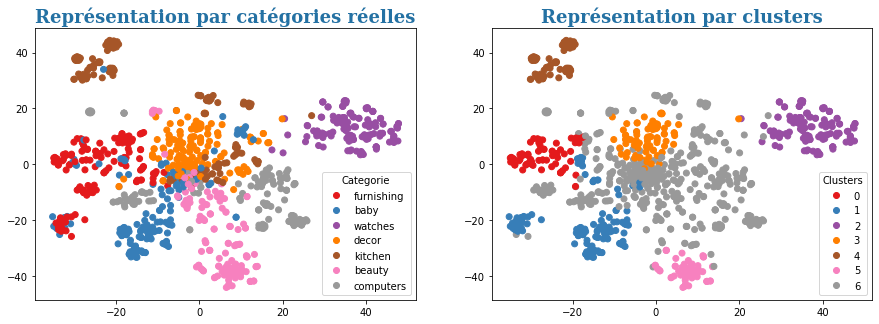

In [219]:
tsne_tfidf = tsne(X_tfidf)
TSNE_visu_fct(tsne_tfidf,y_tfidf_ture.values.tolist(),  LABELS_TFIDF)

# Word Embedding avec Word2Vec , architectures CBOW 

- **Rappel**
- La technique deplongements de mots l'une des représentations les plus populaires du vocabulaire d'un document. Il est capable de capturer le contexte d'un mot dans un document, la similarité sémantique et syntaxique, la relation avec d'autres mots, etc.
- Il s'agit d'une représentation des mots dans un espace avec une forme de similarité entre eux (c'est-à-dire probabiliste), dans lesquels le sens des mots les rapproche dans cet espace, en terme de distances statistiques. C’est un plongement dans un espace de dimension inférieur autour de 20-100 dimensions généralement. 
- Deux méthode de wordembedding sont : 
       - "continuous bag-of-words (CBoW) (CBOW)" :Cette méthode prend le contexte de chaque mot comme entrée et essaie de prédire le mot correspondant au contexte.
       - Skip gram
       

- Vu le context on va utiliser l'drchitecture de "continuous bag-of-words (CBoW)". Car elle est plus rapide et a de meilleures représentations pour les mots les plus fréquents.

In [220]:
from gensim.models import Word2Vec

def build_corpus(data):
    corpus = []
    for sentence in data.iteritems():
        word_list = sentence[1].split(" ")
        corpus.append(word_list)
    return corpus

In [221]:
corpus_w = build_corpus(df_cleaned['text_final'])

# déterminer un windows = 5 : Distance maximale entre le mot actuel et le mot prédit dans une phrase.
w2v_model = Word2Vec(corpus_w, batch_words= 1000,  window =5) 

In [222]:
# Fonction pour calculer le moyenne des vectours pour la liste des document

def vectorize(list_of_docs, model):
    

    features = []

    for tokens in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for token in tokens:
            if token in model.wv:
                try:
                    vectors.append(model.wv[token])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features

In [223]:
vectorized_docs = vectorize(corpus_w, w2v_model)
#print(len(corpus_w))
#print(len(vectorized_docs))

####  Clustering avec kmeans (k=7) sans réduction de la dimensionnalité 

In [224]:
w2v_label_1 , w2v_center_1 = get_clusters(vectorized_docs, 7)

#### Matrice de confusion pour comparer la catégorie réelle avec les clusters obtenus     

Correspondance des clusters :  [6, 4, 2, 3, 5, 0, 1]


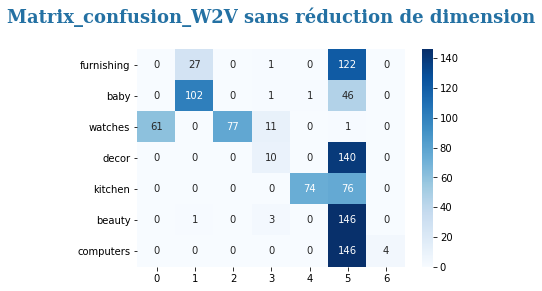

In [225]:
w2v_df_1= pd.concat([pd.DataFrame(vectorized_docs, index = df_cleaned.index), 
                     df_cleaned[['category', 'cat_code']]], axis= 1)
w2v_df_1['cluster'] = w2v_label_1
y_true_w2v_1 = pd.Series(w2v_df_1['cat_code'])
y_pred_w2v_1 = pd.Series(w2v_label_1)


confu_matrix_w2v_1 = confusion_matrix(y_true_w2v_1, y_pred_w2v_1)


corres_w2v_1, con_matrix_trans_1 = conf_mat_transform(confu_matrix_w2v_1) 

df_cm_w2v_1 = pd.DataFrame(con_matrix_trans_1 ,index= w2v_df_1["category"].unique().tolist(), columns = range(0,7))

plt.figure(figsize = (6,4))
sns.heatmap(df_cm_w2v_1, annot=True, cmap="Blues", fmt='g')
plt.title ('Matrix_confusion_W2V sans réduction de dimension\n',fontdict= font_title2)
plt.show()

#### Calcul de ARI 

In [226]:
dict_clusters_w2v_1 = dict(zip(corres_w2v_1, range(0,7)))
y_pred_transform_w2v_1 = y_pred_w2v_1.map(dict_clusters_w2v_1)


# ARI
ARI_W2V_1 = round(metrics.adjusted_rand_score(y_true_w2v_1 , y_pred_transform_w2v_1),2)
print(color.BOLD + color.DARKCYAN + "ARI_W2V :", ARI_W2V_1)


#save labels for plot
LABELS_W2V_1 = y_pred_transform_w2v_1

ARI_W2V : 0.16


In [227]:
# Proportion des produits dans chaque cluqter 
pd.Series(y_pred_transform_w2v_1).value_counts()/10.50

5   64.48
1   12.38
2    7.33
4    7.14
0    5.81
3    2.48
6    0.38
dtype: float64

dim after t-SNE :  (1050, 2)
timing :             8.48 s


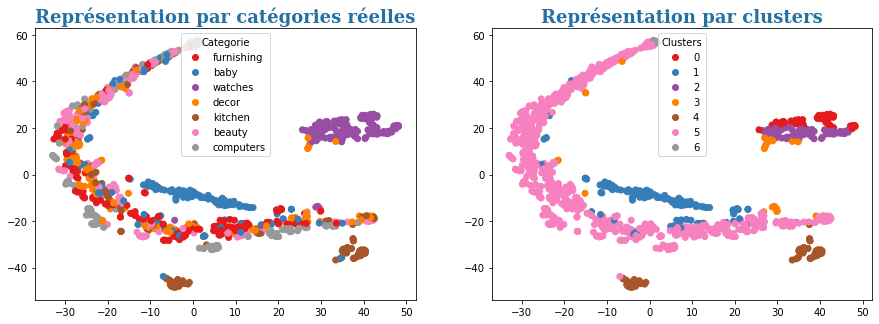

In [228]:
bow_tsne_1 =  tsne(vectorized_docs)

TSNE_visu_fct(bow_tsne_1, y_true_w2v_1.values.tolist(), LABELS_W2V_1)

#### Clustering avec kmeans (k=7) avec  réduction de la dimensionnnalité à l’aide de PCA (Principale Component Analysis)

In [229]:
# Réduction dimension avec SVD en conservant 0.99 de variance 

svd_wv = PCA(n_components=0.99,svd_solver='full')
X_WV = svd_wv.fit_transform(vectorized_docs)

X_WV.shape

(1050, 3)

In [230]:
w2v_label , w2v_center = get_clusters(X_WV, 7)

Correspondance des clusters :  [1, 6, 5, 2, 3, 0, 4]


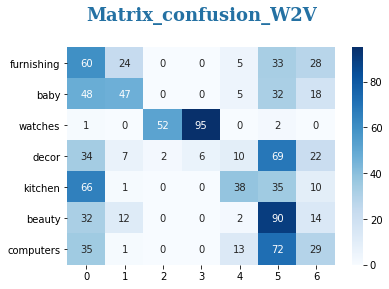

In [231]:
w2v_df= pd.concat([pd.DataFrame(X_WV, index = df_cleaned.index), 
                     df_cleaned[['category', 'cat_code']]], axis= 1)
w2v_df['cluster'] = w2v_label
y_true_w2v = pd.Series(w2v_df['cat_code'])
y_pred_w2v = pd.Series(w2v_label)


confu_matrix_w2v = confusion_matrix(y_true_w2v, y_pred_w2v)


corres_w2v, con_matrix_trans = conf_mat_transform(confu_matrix_w2v) 


#plot,
df_cm_w2v = pd.DataFrame(con_matrix_trans,index= w2v_df["category"].unique().tolist(), columns = range(0,7))

plt.figure(figsize = (6,4))
sns.heatmap(df_cm_w2v, annot=True, cmap="Blues", fmt='g')
plt.title ('Matrix_confusion_W2V\n', fontdict= font_title1)
plt.show()


In [232]:
dict_clusters_w2v = dict(zip(corres_w2v, range(0,7)))
y_pred_transform_w2v = y_pred_w2v.map(dict_clusters_w2v)


# ARI
ARI_W2V = round(metrics.adjusted_rand_score(y_true_w2v , y_pred_transform_w2v),2)
print(color.BOLD + color.DARKCYAN + "ARI_W2V :", ARI_W2V)


#save labels for plot
LABELS_W2V = y_pred_transform_w2v

ARI_W2V : 0.13


In [233]:
# Proportion des produits dans chaque cluqter 
pd.Series(y_pred_transform_w2v).value_counts()/10.50

5   31.71
0   26.29
6   11.52
3    9.62
1    8.76
4    6.95
2    5.14
dtype: float64

dim after t-SNE :  (1050, 2)
timing :            10.17 s


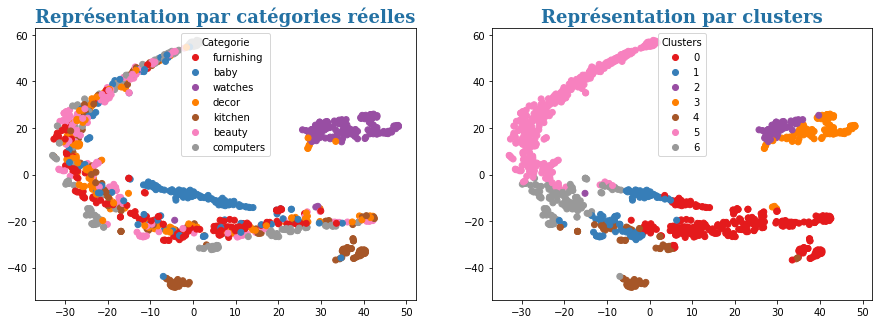

In [234]:
bow_tsne =  tsne(vectorized_docs)

TSNE_visu_fct(bow_tsne, y_true_w2v.values.tolist(), LABELS_W2V)

## Toic Modeling avec Latent Dirichlet Allocation (LDA)

**-Rappel**
- LDA est un modèle probabiliste génératif qui suppose que chaque sujet est un mélange sur un ensemble sous-jacent de mots, et que chaque document est un mélange sur un ensemble de probabilités de sujets.

In [235]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=7, learning_method='online', learning_offset=50.,random_state=0)

lda_model = lda.fit(X_bow)
lda_predict = lda_model.transform(X_bow)

In [236]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                            for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()
    
bow_features = bow.get_feature_names()

In [237]:
print_top_words(lda_model, bow_features, n_top_words = 15)

Topic #0: usb adapter power light lead warranty laptop charger bottle vgn vaio portable fan flexible smartpro
Topic #1: mug ceramic coffee perfect rockmantra safe tea prithish pizza creation kitchen printland cutter dishwasher fresh
Topic #2: watch analog man laptop woman india great discount battery dial strap boy digital maxima resistant
Topic #3: box use wall warranty bowl showpiece key dimension glass brass clean surface beautiful art place
Topic #4: skin combo inch print sticker laptop pad mouse shape cover easy set warranty vinyl wall
Topic #5: baby cotton girl fabric polyester eyelet comfort print ideal curtain aroma towel blue dress box
Topic #6: showpiece single good home blanket abstract wallmantra steel double stainless piece pot art quilt statue



- Le topic 0 peut correspondre à 'computer'
- Le topic 1 peut corresponre à kitchen
- Le topic 3 peut correspondre à 'watch'
- Le topic 6 peut correspondre à 'décor'
- 



- Les autres topic ne sont pas clairement identifiés

In [238]:
list_topics = ['Topic {}'.format(n) for n in range(7)]

lda_transform = pd.DataFrame(lda_predict)
lda_best_topic = lda_transform.idxmax(axis=1)

y_pred_lda = pd.Series(lda_best_topic.values)

y_true_lda = pd.Series(df_cleaned['cat_code'])

Correspondance des clusters :  [6, 5, 2, 3, 1, 4, 0]


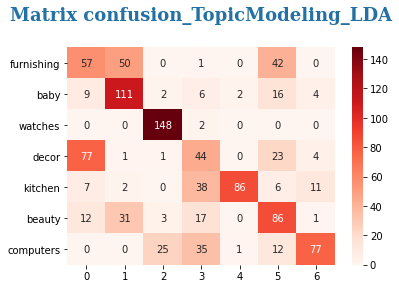

In [239]:
conf_lda = confusion_matrix(y_true_lda, y_pred_lda )


corres_lda, conf_mat_lda_t = conf_mat_transform(conf_lda)


#plot
df_cm_lda = pd.DataFrame(conf_mat_lda_t, index = categories, columns = range(0,7))
plt.figure(figsize = (6,4))
sns.heatmap(df_cm_lda, annot=True, cmap="Reds", fmt='g' )
plt.title("Matrix confusion_TopicModeling_LDA\n", fontdict = font_title2)
plt.show()

In [240]:
dict_clusters_lda = dict(zip(corres_lda, range(0,7)))
y_pred_transform_lda = y_pred_lda.map(dict_clusters_lda)


# ARI
ARI_LDA= round(metrics.adjusted_rand_score(y_true_lda, y_pred_transform_lda),2)
print(color.BOLD + color.PURPLE + "ARI_LDA :", ARI_LDA)


#save labels for plot
LABELS_LDA = y_pred_transform_lda

ARI_LDA : 0.37


Text(0.5, 1.0, 'Part de chaque catégorie dans les topics_LDA\n')

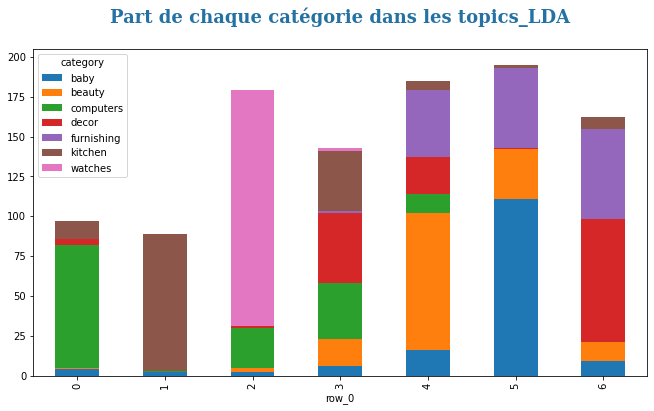

In [241]:
# Part de chaque catégorie dans les topics
pd.crosstab(lda_best_topic, df_cleaned['category']).plot.bar(figsize=(11,6), stacked=True)
plt.title("Part de chaque catégorie dans les topics_LDA\n", fontdict = font_title1)

### Approche DeepLearning : Sentence Embedding avec le modèle pré-entrainée "Universal Sentence Encoder" de google



**Rappel**
- Universal Sentence Encoder encode le texte dans des vecteurs de grande dimension qui peuvent être utilisés pour la classification de texte, la similarité sémantique, le regroupement et d'autres tâches en langage naturel. 
- On utilisee l'encodeur de textex universel pré-trainées qui disponible publiquement dans Tensorflow-hub

In [242]:
from transformers import BertModel, BertConfig
import tensorflow as tf
import tensorflow_hub as hub

In [243]:
import tensorflow as tf

import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import os
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

In [244]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.8.0
2.8.0
Num GPUs Available:  0
True


#### Télécharger le modèle pré-trainé du google depuis TensorFlow hub

In [245]:
url_module= "https://tfhub.dev/google/universal-sentence-encoder/4" #@param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]

print ("module %s loaded" % url_module)

model_use = hub.load(url_module)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [246]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = model_use(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [247]:
batch_size = 10
sentences = df_cleaned['text_final'].to_list()

#### Création d’une représentation vectorielle du document à l’aide de sentence encoder  de USE

In [248]:
features_USE = feature_USE_fct(sentences, batch_size)

In [249]:
features_USE.shape

(1050, 512)

In [250]:
df_cleaned.columns

Index(['category', 'desc_clean', 'pname_clean', 'text', 'text_final', 'final_desc', 'pname_final', 'cat_code'], dtype='object')

- Encodeur de USE crée un vecterur de longeur de 512

#### Réduction de la dimensionnalité avec SVD en conservant 0.99 de variance

In [251]:
# Réduction dimension avec SVD en conservant 0.99 de variance 

svd_USE = TruncatedSVD(n_components=511, random_state=42)
X_USE = svd_USE.fit_transform(features_USE)

cum_variance_USE = np.cumsum(svd_USE.explained_variance_ratio_)
idx_USE = np.argmax(cum_variance_USE> .99)
svd_USE = TruncatedSVD(n_components=idx_USE, random_state=42)
X_svd_USE = svd_USE.fit_transform(features_USE)
X_svd_USE.shape

(1050, 359)

#### Clustering avec kmeans (k=7)

In [252]:
USE_cls, USE_center = get_clusters(features_USE, 7)

In [253]:
USE_df= pd.DataFrame(features_USE, index = df_cleaned.index)
USE_df['category'] = df_cleaned['category']
USE_df['lable'] = df_cleaned['cat_code']
USE_df['cluster'] = pd.Series(USE_cls)
y_true_USE = USE_df['lable']
y_pred_USE = USE_df['cluster']

#### Matrice de confusion pour comparer la catégorie réelle avec les clusters obtenus 

Correspondance des clusters :  [5, 3, 6, 2, 1, 0, 4]


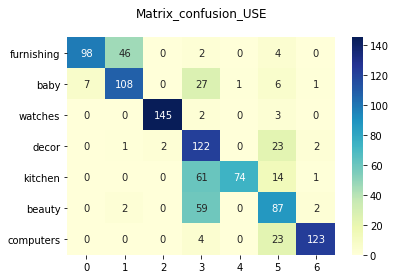

In [254]:
confu_matrix_USE= confusion_matrix(y_true_USE,y_pred_USE)


corres_USE, con_matrix_trans = conf_mat_transform(confu_matrix_USE) 


#plot,
df_cm_USE = pd.DataFrame(con_matrix_trans,index= USE_df["category"].unique().tolist(), columns = range(0,7))
plt.figure(figsize = (6,4))
sns.heatmap(df_cm_USE, annot=True, cmap="YlGnBu", fmt='g')
plt.title ('Matrix_confusion_USE\n')
plt.show()


dict_clusters_USE = dict(zip(corres_USE, range(0,7)))
y_pred_transform_USE = y_pred_USE.map(dict_clusters_USE)


# ARI
ARI_USE = round(metrics.adjusted_rand_score(y_true_USE,y_pred_transform_USE),2)


#save labels for plot
LABELS_USE = y_pred_transform_USE

#### Score ARI (Adjusted Rand Index) 

In [255]:
ARI_USE2 = round(metrics.adjusted_rand_score(y_true_USE,y_pred_transform_USE),2)
print(color.BOLD + color.DARKCYAN + "ARI_USE :" + color.END)
print(color.BOLD + color.DARKCYAN ,ARI_USE2)

ARI_USE :
 0.49


- L'utilisation du modèle prétrainé de USE pour l'extraction des features nous a permis d'obtenir un score plus elevé. 

- Les catégories mal classées sont 'kitche' et 'beauty'

#### Reduction de la dimensionalité à l’aide de T-SNE pour la visualisation 2D des clusters 

In [256]:
X_tsne_USE = tsne(features_USE)

dim after t-SNE :  (1050, 2)
timing :            12.02 s


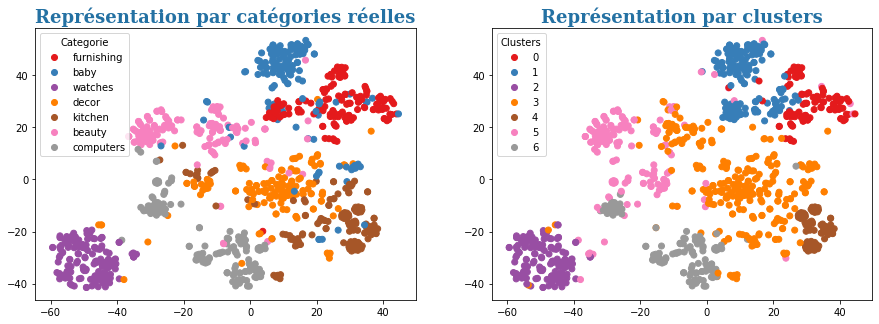

In [257]:

TSNE_visu_fct(X_tsne_USE, y_true_USE.values.tolist(), LABELS_USE)

### Bilan sur le volet NLP 

- Pour la modélisation basée  sur les données textuelles des anomalies sont dûes à la présence de termes communs entre certains de ces textes qui, lorsqu'ils sont vectorisés, obtiennent des valeurs égales pour certaines dimensions. Voir "Afficher la fréquence des mots par catégories" pour les matrice BOW & TFIDF

- Parmis les modèles basés sur les données textuelles l'Universal Sentence Encoder a le meilleur score



# II. Computer vision 


-    **Création d'un dataframe avec catégories pour les images**
-    **Analyse exploratoire des images**
            - Load et  affichage des 4 images de chaque catégorie
-    **Prétraiement des images avant extraction des features**  
-    **Extraction des features avec ORB (Oriented FAST and rotated BRIEF)** 
            - Obtenir les descripteurs de chaque image
            - Création des clusters de descripteurs
            - Création d’un visual bag of words avec a MiniBatchKMeans (k= √ nbre des clusters)
            - Création des histogram 
            - Réduction de dimensionnalité à l’aide de PCA
            - Réduction de diemnsionnalité en 2D à l’aide de Tsne 
	

-      **Clustering à l’aide de Kmean(k = 7)**
-      **Matrice de confusion** 
-      **Score ARI (Adjusted Rand Index)** 
-      **Analyse visuelle : affichage T-SNE selon catégories réelle des images** 


-     **Approche Deep learning (Convolutional Neural Network)** 
            - Prétraitement des images pour CNN : redimensionner en 224x224 ; Reshape  de la matrice des données	
            - Création d'un simple Réseau de neurone pour visualiser les effets sur chaque couche
-     **Approche transfer Learning avec  ImageNet**
            - Télécharger les model pr-entrainé VGG16 
            - Supprimer le dernier couche de fully connected 
            - Extraire les feautures avec le VGG16 
            - Réduction de dimensionnalité à l’aide de PCA 
            - Réduction de la dimensionnalité en 2D à l’aide de Tsne 
-     **Clustering avec kmeans(k = 7)**
-     **Matrice de confusion** 
-     **Score ARI (Adjusted Rand Index)** 
-     **Analyse visuelle : affichage T-SNE selon catégories réelle des images** 



In [258]:
from keras.preprocessing.image import load_img, img_to_array
from sklearn import preprocessing
from matplotlib.image import imread

from IPython.display import Image

from PIL import Image

from os import listdir

import cv2

**- Démarche générale de la modélisation pour le volet de "computer vision"*** 

   - Prétraitement des images :
       - Pour chaque image passage en gris et equalisation, redimensionner ... 
   - Feature extractions avec ORB
 
        - création d'une liste de descripteurs par image ("ORB_keypoints_by_img") qui sera utilisée pour  réaliser les histogrammes par image
        - création d'une liste de descripteurs pour l'ensemble des images ("ORB_keypoints_all") qui sera  utilisé pour créer les clusters de descripteurs
   - Features extraction avec modèle préentrainé de VGG16

#### Création d'un dataframe avec catégories pour les images

In [259]:
from os import listdir
path = r"Dataset+projet+prétraitement+textes+images\Flipkart\Images"
list_photos = [file for file in listdir(path)]
print(len(list_photos))

1050


In [264]:
data.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name', 'product_category_tree', 'pid', 'retail_price', 'discounted_price', 'image', 'is_FK_Advantage_product', 'description', 'product_rating', 'overall_rating', 'brand', 'product_specifications'], dtype='object')

In [265]:
data_image = pd.concat([df_categ['category'],
                         data[["image"]]], axis=1)
le = preprocessing.LabelEncoder()
data_image["label"] = le.fit_transform(data_image["category"])
data_image['category'].value_counts()
data_image

category                                 image  label
0     furnishing  55b85ea15a1536d46b7190ad6fff8ce7.jpg      4
1           baby  7b72c92c2f6c40268628ec5f14c6d590.jpg      0
2           baby  64d5d4a258243731dc7bbb1eef49ad74.jpg      0
3     furnishing  d4684dcdc759dd9cdf41504698d737d8.jpg      4
4     furnishing  6325b6870c54cd47be6ebfbffa620ec7.jpg      4
...          ...                                   ...    ...
1045        baby  958f54f4c46b53c8a0a9b8167d9140bc.jpg      0
1046        baby  fd6cbcc22efb6b761bd564c28928483c.jpg      0
1047        baby  5912e037d12774bb73a2048f35a00009.jpg      0
1048        baby  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg      0
1049        baby  f2f027ad6a6df617c9f125173da71e44.jpg      0

[1050 rows x 3 columns]

# Analyse exploiratoire des images

#### Load et  affichage des 4 images de chaque catégorie


In [266]:
def load_image(file_name):
    file_path = '/'.join(('./Flipkart/Images',file_name))
    return cv2.imread(file_path)

In [267]:
data_image['img']=data_image['image'].apply(load_image)


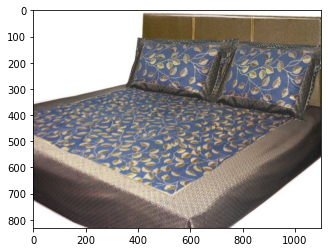

In [268]:
im = data_image.loc[3,'img']
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))

- On constate que les image sont en BGR-format.(Blue(255, 0, 0), Green(0, 255, 0), Red(0, 0, 255))
- Lorsque nous ouvrons une image dans openCV à l'aide de cv2.imread(), elle affiche l'image au format BGR.

furnishing
baby
watches
decor
kitchen
beauty
computers


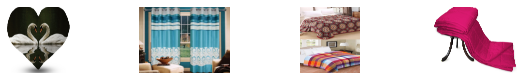

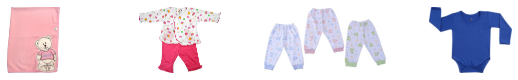

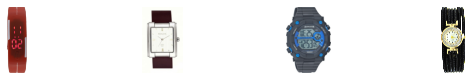

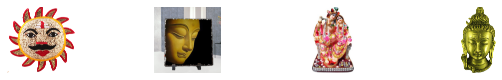

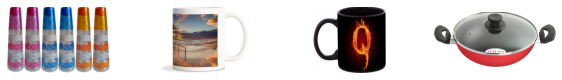

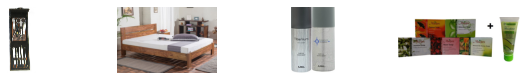

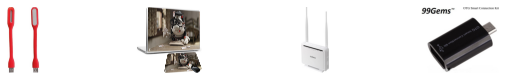

In [269]:
i=1
list_cat = data_image['category'].unique().tolist()


for cat in list_cat: 
    figure = plt.figure(figsize=(10,10))
    print(cat)
    sample=data_image[data_image.category == cat].sample(4).index
    for index in sample:
      
        figure.add_subplot(7,4,i)  
        
        im = data_image.loc[index,'img']
        
        plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
       
        plt.axis('off')
        
        i += 1
             

**Prétraiement des images avant la modélisation** 
- Conversion en noir et blanc
- Redimensionnemen
- Amélioration du contraste
- Egalisation des histograme 
- Application d'u filtrage gaussienà 0.5 sigma pour réduire le bruit et les détails.  

- Cette valeur  de sigma est choisie après avoir testé plusieurs valeurs et le clustering sur les features obteenues par ORB
- Un filtrage plus élevé empêche l'algorithme de détecter les features.



#### Redimensionner les image au carré

In [270]:
def resize_image(img, size):
    # get image dimensions
    h, w = img.shape[:2]
    
    # dif = max (height, width)
    dif = h if h > w else w
    
    # define interpolation for zooming and shrinkage
    interpolation = cv2.INTER_AREA if dif > size else cv2.INTER_CUBIC    
    
    # for square images
    if h == w: 
        return cv2.resize(img, (size, size), interpolation)
    
    # for non square images
    x_pos = (dif - w)//2
    y_pos = (dif - h)//2
    
    # define mask for both color and back and white images
    if len(img.shape) == 2:
        mask = np.full((dif, dif), 255, dtype=img.dtype)
        mask[y_pos:y_pos+h, x_pos:x_pos+w] = img[:h, :w]
    else:
        mask = np.full((dif, dif, img.shape[2]), 255, dtype=img.dtype)
        mask[y_pos:y_pos+h, x_pos:x_pos+w, :] = img[:h, :w, :]
    
    return cv2.resize(mask, (size, size), interpolation)

In [271]:
imtest = data_image.loc[15,'img']

# 1- Grayscale
img_gray = cv2.cvtColor(imtest, cv2.COLOR_BGR2GRAY)

# 2- Redimensionner
imtest_square = resize_image(img_gray, 224)

#3- Améliorer le contrast
clahe = cv2.createCLAHE(clipLimit=1, tileGridSize=(8,8))
cl = clahe.apply(imtest_square)

#4- Equalize Histogramme
img_eh = cv2.equalizeHist(cl)

#5-Filtre Gaussien
import scipy.ndimage
import scipy
img_flt = scipy.ndimage.filters.gaussian_filter(img_eh, sigma=2)

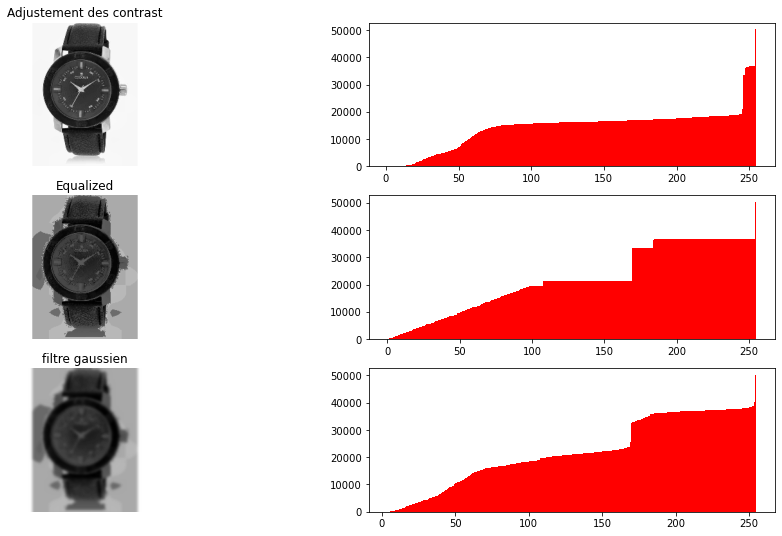

In [272]:
fig = plt.figure(figsize=(16,9))


ax = fig.add_subplot(321)
plt.imshow(cl, cmap='gray')   
plt.title('Adjustement des contrast')
plt.axis('off')

ax = fig.add_subplot(322)
ax = plt.hist(cl.reshape(-1),bins= 256, color= 'r', cumulative = True)

ax = fig.add_subplot(323)
plt.imshow(img_eh, cmap='gray')  
plt.title('Equalized')
plt.axis('off')

ax = fig.add_subplot(324)
ax = plt.hist(img_eh.reshape(-1),bins= 256, color= 'r', cumulative = True)

ax = fig.add_subplot(325)
plt.imshow(img_flt, cmap='gray')   
plt.title('filtre gaussien')
plt.axis('off')

ax = fig.add_subplot(326)
ax = plt.hist(img_flt.flatten(),bins= 256, color= 'r', cumulative = True)

- A présent, on va combiner les trois fonctions pour l'appliquer sur l'ensemble des images 

In [273]:
# Fonction pour prétraitment des images 

def image_treatment(img):
    # conversion en noir et blanc
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Redimensionnement
    img_square = resize_image(img_gray, 224)
    # Amélioration du contraste
    cl = clahe.apply(img_square)
    # Egalisation des histograme
    equal_hist = cv2.equalizeHist(cl)
    # filtrage gaussienà 0.5 sigma pour réduire le bruit et les détails
    img_flt = scipy.ndimage.filters.gaussian_filter(equal_hist, sigma=0.5)
    return img_flt

In [274]:
data_image['pretraeated_img'] = data_image.loc[:,'img'].apply(image_treatment)

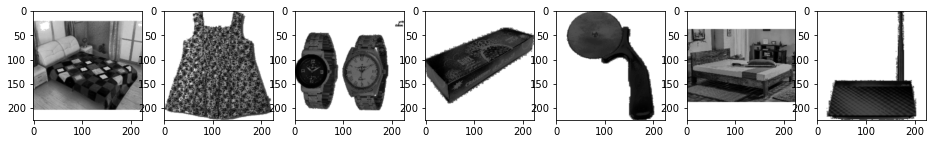

In [275]:
# Afficher une image par catégorie après le prétraitement des images 
li_cat = data_image['category'].unique().tolist()

figure = plt.figure(figsize=(16,8))

i=1
for cat in li_cat:
   
    sample=data_image[data_image.category == cat].sample(1).index

    for index in sample:
  
        figure.add_subplot(1,7,i)
        im = data_image.loc[index,'pretraeated_img']
        plt.imshow(im, cmap='gray')
        plt.axis('on')
        i += 1
        
        

#### Extraction des features avec ORB (Oriented FAST and rotated BRIEF)

In [276]:
# Détermination des descripteurs ORB

orb = cv2.ORB_create(nfeatures = 500)

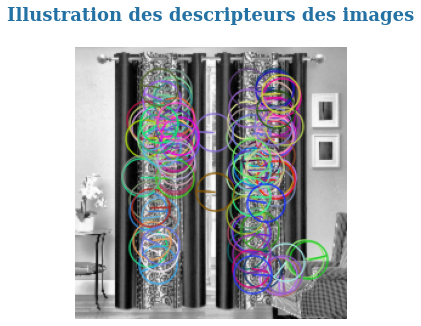

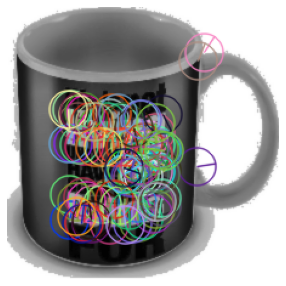

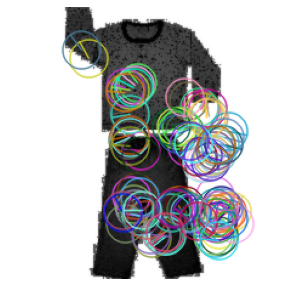

In [277]:
# Exemple de descripteur des images 
kp0, des0 = orb.detectAndCompute(data_image.pretraeated_img[0], None)
img0 = cv2.drawKeypoints(data_image.pretraeated_img[0], kp0[:100], outImage=None, 
                         flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize = (5,5))
plt.imshow(img0)
plt.axis('off')
plt.title('Illustration des descripteurs des images\n', fontdict = font_title1)
plt.show()

kp1, des1 = orb.detectAndCompute(data_image.pretraeated_img[50], None)
img1 = cv2.drawKeypoints(data_image.pretraeated_img[50], kp1[:100], outImage=None, 
                         flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize = (5,5))
plt.imshow(img1)
plt.axis('off')
plt.show()



kp2, des2 = orb.detectAndCompute(data_image.pretraeated_img[45], None)
img2 = cv2.drawKeypoints(data_image.pretraeated_img[40], kp2[:100], outImage=None, 
                         flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize = (5,5))
plt.imshow(img2)
plt.axis('off')
plt.show()


In [278]:
# Fonction pour détecter les keypoints des images 
def get_descriptors(img) :
    kp, des = orb.detectAndCompute(img, None)
    return des

#### Obtenir les descripteurs de chaque image

In [279]:
# Déterminer le descripteur de chaque image 
data_image['descriptors'] = data_image.loc[:,'pretraeated_img'].apply(get_descriptors)

In [280]:
print("Nombre de keypoints pour l\'item 0 : ", len(get_descriptors(data_image.pretraeated_img[0])))
print("Nombre de keypoints pour l\'item 100 : ", len(get_descriptors(data_image.pretraeated_img[100])))
print('Dimension descripteurs l\'item 0 : ', data_image['descriptors'][0].shape)
print('Dimension descripteurs l\'item 100 : ', data_image['descriptors'][100].shape)

Nombre de keypoints pour l'item 0 :  394
Nombre de keypoints pour l'item 100 :  387
Dimension descripteurs l'item 0 :  (394, 32)
Dimension descripteurs l'item 100 :  (387, 32)


- Chaque descripteur est un vecteur de longueur 32

- On va vérifier si le nombre des descripterur des images est identique 


1022   447.00
727    446.00
772    446.00
226    446.00
904    445.00
        ...  
834     64.00
593     49.00
724     42.00
354     40.00
859     21.00
Name: nb_descriptors, Length: 1050, dtype: float64


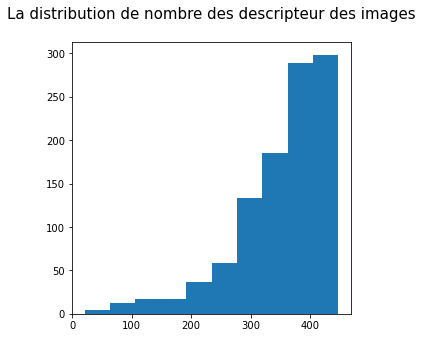

In [281]:
# Nombre des descripteur de chaque image
for index, row in data_image.iterrows():
    if row['descriptors'] is not None :
        data_image.at[index,'nb_descriptors'] = len(row['descriptors'])
    else : 
        data_image.at[index,'nb_descriptors'] = 0

# Trier le nbr des descripteurs de 20 image         
data_image['nb_descriptors'].sort_values(ascending= False)[0:20]

print(data_image['nb_descriptors'].sort_values(ascending= False))
plt.figure(figsize = (5,5))
plt.hist(data_image.nb_descriptors)
plt.title("La distribution de nombre des descripteur des images\n", fontsize= 15)
plt.show()

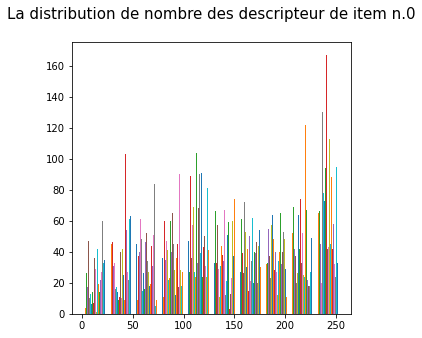

In [282]:
#print(data_image['nb_descriptors'].sort_values(ascending= False))
plt.figure(figsize = (5,5))
plt.hist(data_image['descriptors'][0])
plt.title("La distribution de nombre des descripteur de item n.0\n", fontsize= 15)
plt.show()

In [283]:
des_par_img = np.asarray(data_image['descriptors'])

# Création des clusters de descripteurs; Visual Bag of words
- On va créer liste de descripteurs pour l'ensemble des images ("list_descriptors") qui sera utilisé pour créer les clusters de descripteurs

In [284]:
# Regroupement des descripterus avant le clustering 
list_descriptors = data_image.loc[0,'descriptors']

for i in range (1, data_image.shape[0]):
    if data_image.loc[i,'descriptors'] is not None :
        list_descriptors = np.vstack((list_descriptors, data_image.loc[i,'descriptors']))

print("Nombre de descripteurs : ", list_descriptors.shape)

Nombre de descripteurs :  (368902, 32)


- On a obtenu 368902 descripteurs de dimensions 32 pour nos 1050 images, soit environ 351 descripteurs par image.

- A présent on va les regrouper par MiniBatchKMeans pour créer des bags-of-visual-words sous forme d'histograme 
- Pour le nombre de clusters on choisi la racine carée de len(list_descrpteur) 


In [285]:
#### Création d’un visual bag of words avec a MiniBatchKMeans

In [286]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

In [287]:
# Nombre de cluster == racine crée de len(list_descripteur )
t_cls = time.time()
k_clusters = int(round(np.sqrt(len(list_descriptors)),0))


print("Nombre de clusters estimés : ", k_clusters)
print("Création de",k_clusters, "clusters de descripteurs ...")


cls = MiniBatchKMeans(n_clusters=k_clusters, n_init=10, random_state=0, init_size=3*k_clusters)
cls_orb= cls.fit(list_descriptors)

d_cls= time.time() - t_cls
print('timing : ', '%15.2f' % d_cls, 's')

Nombre de clusters estimés :  607
Création de 607 clusters de descripteurs ...
timing :            53.61 s



* Pour chaque image : 
   - prédiction des numéros de cluster de chaque descripteur
   - création d'un histogramme = comptage pour chaque numéro de cluster du nombre de descripteurs de l'image

#### Création des histograms

In [288]:
def create_histogram(descriptors):
    histogram = np.zeros(k_clusters)
    if descriptors is not None :
        cluster_result =  cls_orb.predict(descriptors)
        for i in cluster_result:
            histogram[i] += 1.0
    return histogram

In [289]:
hist_orb = data_image['descriptors'].apply(create_histogram)


In [290]:
# Création du matrix de histograms
hist_vectors=[]

for i, image_desc in enumerate(des_par_img) :
    if i%100 == 0 : print(i)  
    hist_orb = create_histogram(image_desc) #calculates the histogram
    hist_vectors.append(hist_orb) #histogram is the feature vector

im_features = np.asarray(hist_vectors)
im_features.shape

0
100
200
300
400
500
600
700
800
900
1000


(1050, 607)

#### Réduction de dimensionnalité à l’aide de PCA et Tsne

- **On va réduire la dimension pour créer des feautres décorréllées entre eux** 

In [291]:
# PCA pour conserver plus de 95 % de variannce expliquée
pca_img = PCA(n_components=0.95, svd_solver='full')
feat_pca_img= pca_img.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca_img.shape)

Dimensions dataset après réduction PCA :  (1050, 383)


In [292]:
X_tsne_orb = tsne(feat_pca_img)


dim after t-SNE :  (1050, 2)
timing :             9.31 s


#### Clustering à l’aide de Kmean(k = 7) à partir de tsne

In [293]:
clus_orb, orb_center = get_clusters(X_tsne_orb,7)

#### Matrice de confusion pour comparer les catégories réelles avec les clusters obtenus

Correspondance des clusters :  [0, 5, 1, 3, 2, 4, 6]


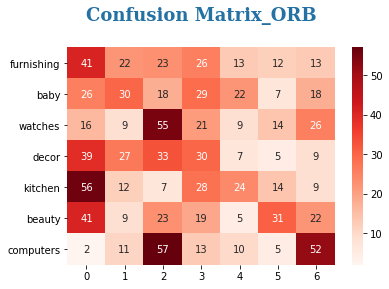

In [294]:
df_tsne_orb = pd.concat([pd.DataFrame(X_tsne_orb, index = data_image.index), data_image[['label', 'category']]], axis = 1)

y_true_orb = df_tsne_orb["label"]
df_tsne_orb['cluster'] = clus_orb
y_pred_orb = df_tsne_orb['cluster']


conf_mat_orb = metrics.confusion_matrix(y_true_orb, y_pred_orb)

corresp_orb, conf_mat_orb_trans = conf_mat_transform(conf_mat_orb)


#print(metrics.classification_report(y_true_orb, y_pred_orb))

df_cm_img_t = pd.DataFrame(conf_mat_orb_trans, index = df_tsne_orb['category'].unique().tolist())
plt.figure(figsize = (6,4))
sns.heatmap(df_cm_img_t, annot=True, cmap="Reds", fmt='g' )
plt.title("Confusion Matrix_ORB\n", fontdict = font_title1)
plt.show()

#### Calcul du ARI 

In [295]:
dict_clusters_orb = dict(zip(corresp_orb, range(0,7)))
y_pred_orb_transform = y_pred_orb.map(dict_clusters_orb)


# ARI
ARI_ORB= round(metrics.adjusted_rand_score(y_true_orb, y_pred_orb_transform),2)

print(color.BOLD + color.RED + "ARI_ORB:" )
print( ARI_ORB)
LABELS_ORB = y_pred_orb_transform

ARI_ORB:
0.04


In [296]:
# Proportion des produits dans chaque cluqter 
pd.Series(y_pred_orb_transform).value_counts()/10.50

0   21.05
2   20.57
3   15.81
6   14.19
1   11.43
4    8.57
5    8.38
Name: cluster, dtype: float64

#### Analyse visuelle : affichage T-SNE selon catégories réelle des images 


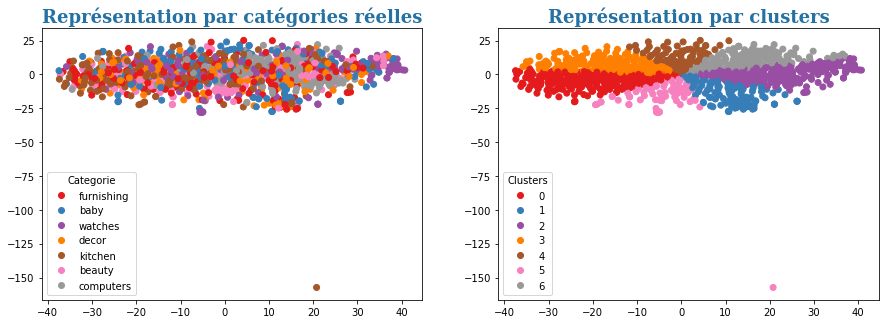

In [297]:
TSNE_visu_fct(X_tsne_orb, y_true_orb.values.tolist(), LABELS_ORB)

###  Approche Deep learning (Convolutional Neural Network)


In [298]:
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

from keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization
from keras.applications.vgg16 import VGG16

from keras.applications.vgg16 import preprocess_input

- **Prétraitement des images pour CNN** : 
     - Redimensionner en 224x224  
     - Reshape  de la matrice des données    

In [299]:
# Prétraitement des image pour l'algorithme CNN

def traitement_image_CNN(img):
    # convert to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Resizing
    img = resize_image(img, 224)
    img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
  #  img = preprocess_input(img)
    
    return img

data_image['process_VGG16'] = data_image.loc[:,'img'].apply(traitement_image_CNN)

In [300]:
# Créer le matrix d'input et d'output

X = data_image['process_VGG16'].loc[0]
for row in data_image['process_VGG16'][1:]:
    X = np.concatenate((X,row), axis=0)
X.shape

(1050, 224, 224, 3)


#### Création d'un simple Réseau de neurone pour visualiser les effets sur chaque couche


 ------------------------------------
**Couche de Convolution et MaxPoolig**
# ------------------------------------

-Conv2D : https://keras.io/layers/convolutional/
- filters : nombres de filtres de convolutions
- kernel_size : taille des filtres de la fenêtre de convolution 
- input_shape : taille de l'image en entrée (à préciser seulement pour la première couche)
- activation  : choix de la fonction d'activation
- BatchNormalisation : permet de normaliser les coefficients d'activation afin de les maintenirs proche de 0 pour simplifier les calculs numériques

- MaxPooling : Opération de maxPooling sur des données spatiales (2D) : voir illustration ci-dessus
- Dropout : permet de désactiver aléatoirement une proportion de neurones (afin d'éviter le surentrainement sur le jeu d'entrainement)


In [301]:
# Initialisation 
model = Sequential()


model.add(Conv2D(filters = 32, kernel_size = (5, 5), activation='relu', padding='Same', input_shape = (224, 224, 3)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (5, 5), activation='relu', padding='Same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(strides=(2,2)))
model.add(Dropout(0.25))

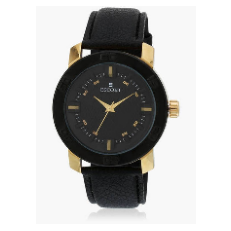

In [302]:
image_15 = data_image.loc[15,'img']
image_15 = cv2.cvtColor(image_15, cv2.COLOR_BGR2RGB)
image_15 = resize_image(image_15,224)
image_reshaped = image_15.reshape((1, image_15.shape[0], image_15.shape[1], image_15.shape[2]))
plt.imshow(image_15)
plt.axis('off')
plt.show()

In [303]:
# Initialisation 
model = Sequential()


model.add(Conv2D(filters = 32, kernel_size = (5, 5), activation='relu', padding='Same', input_shape = (224, 224, 3)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (5, 5), activation='relu', padding='Same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(strides=(2,2)))
model.add(Dropout(0.25))

# redefine model to output after each hidden layer
outputs = [model.layers[i].output for i in range(4)]
model = Model(inputs=model.inputs, outputs=outputs)


feature_maps_15 = model.predict(image_reshaped)

In [304]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4_input (InputLayer)  [(None, 224, 224, 3)]    0         
                                                                 
 conv2d_4 (Conv2D)           (None, 224, 224, 32)      2432      
                                                                 
 batch_normalization_4 (Batc  (None, 224, 224, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 224, 224, 32)      25632     
                                                                 
 batch_normalization_5 (Batc  (None, 224, 224, 32)     128       
 hNormalization)                                                 
                                                                 
Total params: 28,320
Trainable params: 28,192
Non-trainable p

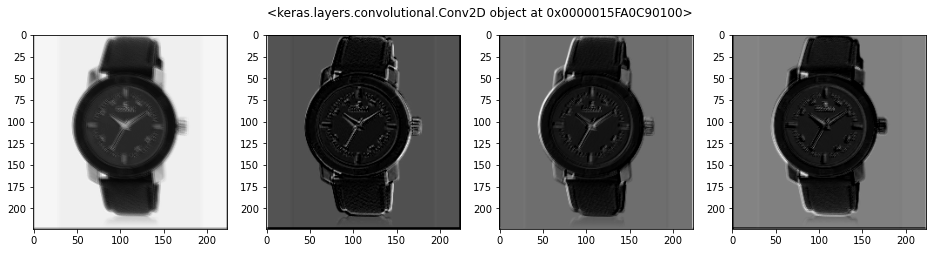

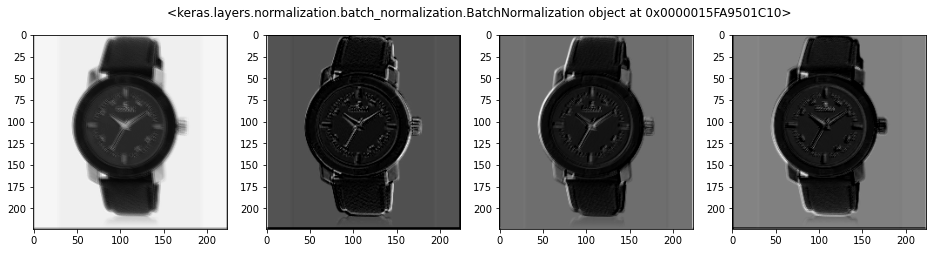

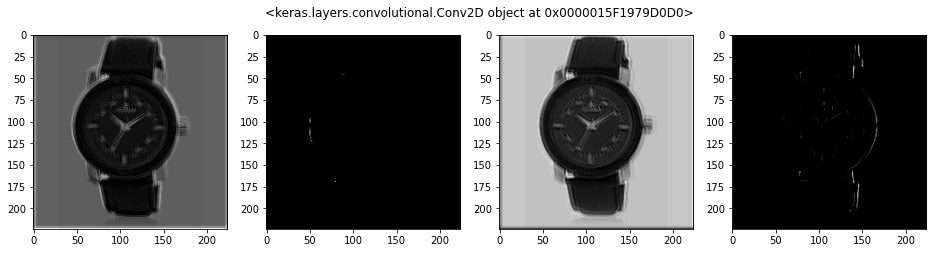

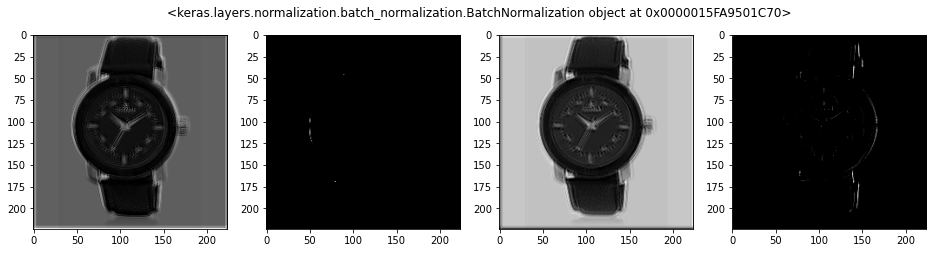

In [305]:
# Afficher les 4 element de chaque feauture_map
for n,fmap in enumerate(feature_maps_15):
    fig=plt.figure(figsize=(16,4))
    plt.title(model.layers[n+1])
    plt.axis('off')
    for i in range(4):
        ax=fig.add_subplot(1,4,i+1)
        #ax.set_xticks([])
        #ax.set_yticks([])
        plt.imshow(fmap[0, :, :, i], cmap='gray')
    plt.show()

## Approche Transfer Learning avec ImageNet

In [306]:
#### Télécharger les model pr-entrainé VGG16

In [307]:
#base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
#base_model.trainable = False

In [308]:
# Télecharger  les "weight" du pretrained modèle depuis l'ordinateur 
vgg_weight_path = r'C:\Users\faeze\.keras\models\vgg16_weights_tf_dim_ordering_tf_kernels_notop (2).h5'

vgg16 = VGG16(
    weights=vgg_weight_path,
    include_top=False, 
    input_shape=(224, 224, 3))

In [309]:
# Sélection de l'optimiseeur pour la decente de gradient
from tensorflow.keras.optimizers import Adam, RMSprop


for layer in vgg16.layers:
    layer.trainable = False


x = vgg16.output
x = Flatten()(x)

# Add the fully-connected layer for the classification in 7 categories
predictions = Dense(7, activation='softmax')(x)

# Define le nouveau model
model_vgg = Model(inputs=vgg16.input, outputs=predictions)

# Sélection de l'optimiser pour la decente de gradient
optimizer_rms= RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
optimizer_adm= Adam(lr=0.0001)

# Compile  le model 
model_vgg.compile(loss="categorical_crossentropy", optimizer = optimizer_adm, metrics=["accuracy"])

In [310]:
model_vgg.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

- Afin de faire converger l'optimiseur plus rapidement et de minimiser "loss fonction", on utilise une méthode de recuit du taux d'apprentissage (Learning Rate).

- Il est préférable d'avoir un taux d'apprentissage décroissant au cours de l'apprentissage pour atteindre efficacement le minimum global de la fonction de perte.

- Pour conserver l'avantage du temps de calcul rapide avec un LR élevé, on va diminuer le taux d'apprentissage( tous les X pas (epoch) selon si cela est nécessaire (lorsque la précision n'est pas améliorée).


#### Supprimer le dernier couche de fully connected 

In [311]:
t = time.time()

vgg16_tl = VGG16(
    weights=vgg_weight_path,
    include_top=False, 
    input_shape=(224, 224, 3))


x_tl = vgg16_tl.output
x_tl= Flatten()(x_tl)

f_model = Model(inputs=vgg16_tl.input, outputs=x_tl)
d= time.time() - t

print("timing : ", "%15.2f" % d, "s")
# Display the structure of the network
f_model.summary()

timing :             0.93 s
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (N

In [312]:
# Normalisation des vecteurs 
X_norm = X/256

### Extraire les feautures avec le VGG16 

In [ ]:
t =time.time()
features_vgg = f_model.predict(X_norm)
print(features_vgg.shape)

d =time.time()- t
print("timing : ", "%15.2f" % d, "s")

### Réduction de dimensionnalité à l’aide de PCA  

- Réduction avec PCA permet de créer des feautures qui ne sont pas corrélées entre elle, tout en conservant une maximum de variabilité, ici 0.99%
- PCA permet aussi de réduire le temps de tratement du T-SNE

In [326]:
# Réduire la dimension après feauture extraction en conservant plus de 99 % de variance 

pca_img = PCA(n_components=0.99, svd_solver='full')
feat_pca_vgg= pca_img.fit_transform(features_vgg)

print("Dimensions dataset avant PCA : ", features_vgg.shape)
print("Dimensions dataset après PCA : ", feat_pca_vgg.shape)

Dimensions dataset avant PCA :  (1050, 25088)
Dimensions dataset après PCA :  (1050, 915)


#### Réduction de la dimensionnalité en 2D à l’aide de Tsne 

In [315]:
t_vgg = time.time()
tsne_img = TSNE(n_components = 2, perplexity=30, 
                     n_iter=2000, init='random', random_state=1)

X_tsne_vgg = tsne_img.fit_transform(feat_pca_vgg)

df_tsne_vgg = pd.DataFrame(X_tsne_vgg[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne_vgg["class"] = data_image["category"]

d_vgg= time.time() - t_vgg
print(df_tsne_vgg.shape)
print('timing : ', '%15.2f' % d_vgg, 's') 

(1050, 3)
timing :            15.23 s


In [316]:
X_tsne_vgg16 = tsne(feat_pca_vgg)

dim after t-SNE :  (1050, 2)
timing :            15.60 s


### Création des clusters avec kmeans(k = 7) à partir de TSNE

In [317]:
# Créer le 7 cluter 
vgg16_pred, center_vgg16 = get_clusters(X_tsne_vgg16, 7)

#### Matrice de confusion pour comparer la catégorie réelle avec les clusters obtenus

Correspondance des clusters :  [1, 6, 5, 0, 3, 4, 2]


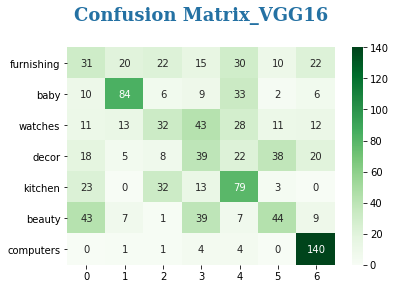

In [318]:
df_tsne_vgg16 = pd.DataFrame(X_tsne_vgg16[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne_vgg16["class"] = data_image["category"]
df_tsne_vgg16["cluster_vgg16"] = vgg16_pred
df_tsne_vgg16_cls = pd.concat([df_tsne_vgg16, data_image[['label']]], axis = 1)


y_true_vgg16 = df_tsne_vgg16_cls["label"]
y_pred_vgg16 = pd.Series(vgg16_pred)



#Confusion Matrix 

conf_vgg16 = confusion_matrix(y_true_vgg16, y_pred_vgg16)

#Transformation du matrix de confusion 
corresp_vgg16, conf_mat_vgg16_t = conf_mat_transform(conf_vgg16) 
#plot
df_cm_vgg16 = pd.DataFrame(conf_mat_vgg16_t, index = df_tsne_vgg16_cls['class'].unique().tolist(), columns = range(0,7))
plt.figure(figsize = (6,4))
sns.heatmap(df_cm_vgg16, annot=True, cmap="Greens", fmt='g' )
plt.title("Confusion Matrix_VGG16\n", fontdict= font_title2)
plt.show()

#### Calcul de ARI 

In [319]:
#re-assign clusters
dict_clusters_VGG = dict(zip(corresp_vgg16, range(0,7)))
y_pred_vgg16_t = y_pred_vgg16.map(dict_clusters_VGG)
center_vgg16.index = center_vgg16.index.map(dict_clusters_VGG)

print(color.BOLD + color.RED + "ARI_VGG16:") 
ARI_VGG = round(metrics.adjusted_rand_score(y_true_vgg16,y_pred_vgg16_t),2)
print(ARI_VGG)
LABELS_VGG = y_pred_vgg16_t

ARI_VGG16:
0.21


In [320]:
# Proportion des produits dans chaque cluqter 
pd.Series(y_pred_vgg16_t).value_counts()/10.50

6   19.90
4   19.33
3   15.43
0   12.95
1   12.38
5   10.29
2    9.71
dtype: float64

#### Analyse visuelle : affichage T-SNE selon catégories réelle des images 

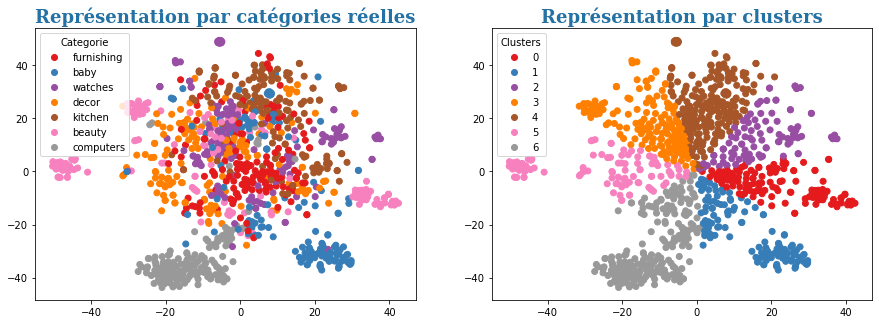

In [321]:
TSNE_visu_fct(X_tsne_vgg16, y_true_vgg16.values.tolist(), LABELS_VGG)

#### Bilan sur le volet computer vision 

- On a pu obtenu un meilleurs score avec le modèle pré_entrainé. 
- Avec la méthode de ORB on a pu identifié les clusters cepandant la segmentation n'est pas parfaite

## Comparaison des modèles

In [322]:
data_model = {'Model':['BOW', 'TFIDF', 'W2V', 'LDA-BOW' ,'USE','ORB', 'VGG16'], 
        'ARI':[ARI_BOW, ARI_TFIDF, ARI_W2V, 
               ARI_LDA, ARI_USE,
               ARI_ORB, ARI_VGG]}
model_df = pd.DataFrame(data_model)

display(model_df)


Model  ARI
0      BOW 0.27
1    TFIDF 0.32
2      W2V 0.13
3  LDA-BOW 0.37
4      USE 0.49
5      ORB 0.04
6    VGG16 0.21

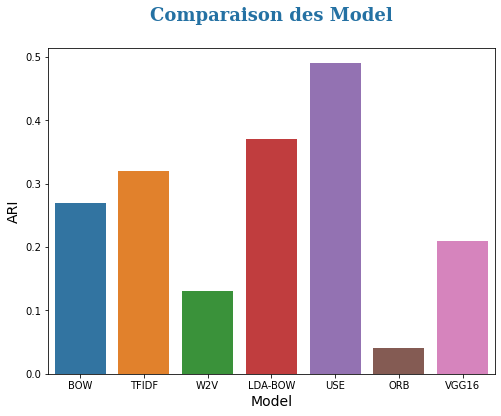

In [323]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(data = model_df, x= 'Model', y= 'ARI')

plt.xlabel("Model", size=14)
plt.ylabel("ARI", size=14)
plt.title("Comparaison des Model\n", fontdict = font_title1)
plt.show()
#plt.savefig("Comparaison model.png")

## Conclusion 

- On constate que les modèle sur la base de donnée textuelles ont une meuilleurs performance que les autres 
- Données textuelles nous permets de créer des modèle de clustering
- Identification des produit est difficile à catégoriser 


## Piste de recherche 

- Fusionner les features de texte er des images 
- Effectuer un apprentissage supervisé en calculant le proba d'appartenance d'un produit à une catégorie
- Pondérer le probabilité du volet NLP et des computer vision pour obtenir le meuiller score 

